# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import sys
ROOT = '../'
sys.path.append(ROOT)  # Add the root folder to the sys.path


# Import the modules
from config import *

# Reload the configuration
from importlib import reload
reload(sys.modules['config'])

# Import the reloaded modules
from config import *

# Gemini

In [3]:
# Set the path to the dataset
MERGED_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_daily_gemini-1.5-flash_opinion.csv")
OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_gemini-1.5-flash_opinion.csv")

In [4]:
merged_daily_with_opinion = pd.read_csv(MERGED_OPINION_DATASET_PATH)
daily_opinion = pd.read_csv(OPINION_DATASET_PATH)

In [5]:
merged_daily_with_opinion.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same,The news and Reddit posts are mixed. Some arti...,neutral,hold,5.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,"[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,"[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same,"The news and Reddit posts are mixed, with some...",negative,hold,6.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,"[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same,The news and Reddit posts contain a mix of pos...,neutral,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,"[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0


In [6]:
daily_opinion.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The news and Reddit posts are mixed. Some arti...,neutral,hold,5.0
1,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0
2,"The news and Reddit posts are mixed, with some...",negative,hold,6.0
3,The news and Reddit posts contain a mix of pos...,neutral,hold,6.0
4,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0


In [7]:
# Show nan values
merged_daily_with_opinion.isnull().sum()

timestamp                             0
open                                  0
close                                 0
high                                  0
low                                   0
volume                                0
blocks-size                           0
avg-block-size                        0
n-transactions-total                  0
n-transactions-per-block              0
hash-rate                             0
difficulty                            0
miners-revenue                        0
transaction-fees-usd                  0
n-unique-addresses                    0
n-transactions                        0
estimated-transaction-volume-usd      0
total-bitcoins                        0
market-cap                            0
fng_value                           756
fng_value_classification            756
fng_sentiment                       756
cbbi_value                            0
cbbi_sentiment                        0
cointelegraph                         0


In [8]:
# Show nan values
daily_opinion.isnull().sum()

reasoning_text     0
sentiment_class    0
action_class       0
action_score       0
dtype: int64

In [9]:
# Sobstitute the NaN values with None
merged_daily_with_opinion.fillna('None', inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_9056\1592612661.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_daily_with_opinion.fillna('None', inplace=True)


In [10]:
# Display reasoning, sentiment and action of a row
index = 0
reasoning = merged_daily_with_opinion['reasoning_text'].values[index]
sentiment = merged_daily_with_opinion['sentiment_class'].values[index]
action = merged_daily_with_opinion['action_class'].values[index]
action_score = merged_daily_with_opinion['action_score'].values[index]

print("Reasoning: ", reasoning)
print("Sentiment: ", sentiment)
print("Action: ", action)
print("Action score: ", action_score)

Reasoning:  The news and Reddit posts are mixed. Some articles highlight the potential of Bitcoin as a secure and decentralized alternative to traditional financial systems, while others express concerns about the scalability of the Bitcoin network and the potential for manipulation by centralized entities. The Reddit posts also reflect a divided community, with some users expressing strong support for Bitcoin and others expressing skepticism or even hostility.
Sentiment:  neutral
Action:  hold
Action score:  5.0


In [11]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
positive    1276
neutral     1176
negative     643
Name: count, dtype: int64

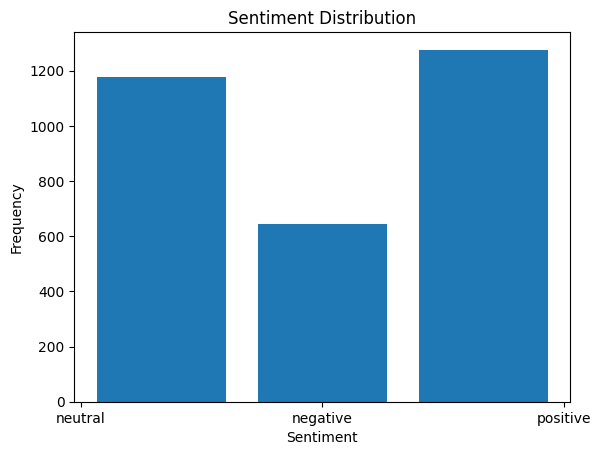

In [12]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [13]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    2186
buy      660
sell     249
Name: count, dtype: int64

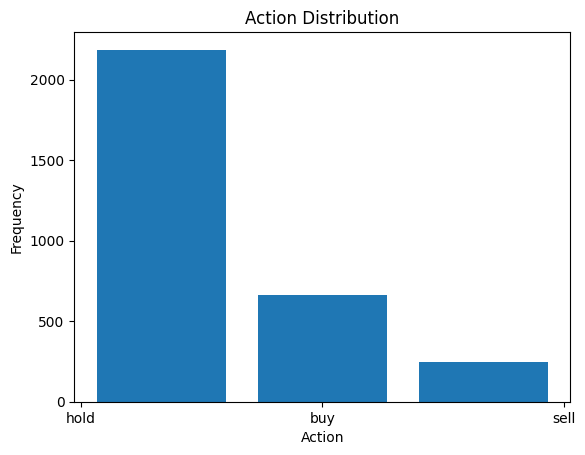

In [14]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

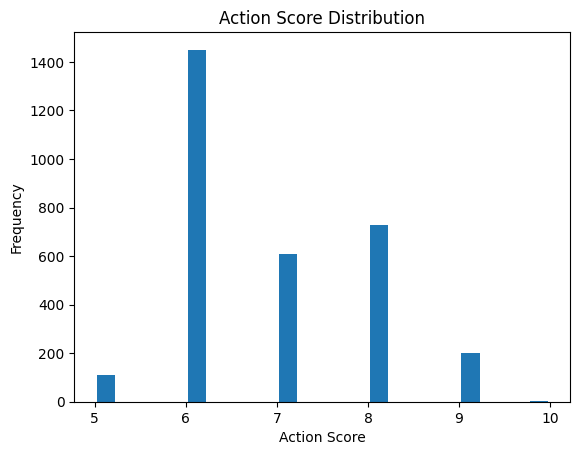

In [15]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

In [16]:
# Select the rows where both cointelegraph and reddit columns are == '[]'
empty_cointelegraph_reddit_rows = merged_daily_with_opinion[(merged_daily_with_opinion['cointelegraph'] == '[]') & (merged_daily_with_opinion['reddit'] == '[]')]
empty_cointelegraph_reddit_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
2750,2023-07-22,29940.0,30012.0,30035.0,29939.0,4.977457,497753.884761,1.668878,868041114.0,2154.850746,...,"[[599049, '2023-07-22 23:30:30', ""China's Cent...",[],29981.50,29811.25,-0.56785,same,The news about China's digital yuan adoption a...,neutral,hold,6.0
2799,2023-09-09,25917.0,25873.0,25917.0,25872.0,6.370074,509510.723052,1.696613,891184188.0,3956.350993,...,"[[606731, '2023-09-09 22:00:44', 'Turkish Cryp...",[],25894.75,25896.25,0.005793,same,The news is mixed. While some news items are p...,negative,hold,6.0
2806,2023-09-16,26625.0,26663.0,26692.0,26605.0,33.429655,511321.542197,1.684559,895054866.0,3826.735484,...,"[[607787, '2023-09-16 23:30:37', ""Debunking Cr...",[],26646.25,26525.25,-0.454098,same,"The news items are mixed, with some positive d...",positive,hold,7.0
2827,2023-10-07,27927.0,27931.0,27965.0,27861.0,8.805102,516533.519562,1.586042,903681819.0,1430.216374,...,"[[611203, '2023-10-07 23:30:28', 'Russian Pres...",[],27921.00,27975.25,0.194298,same,The news is mixed. Some news items are positiv...,negative,hold,6.0


In [17]:
# Show the reasoning_text, sentiment_class and action_class of these rows
for i, row in empty_cointelegraph_reddit_rows.iterrows():
    reasoning_text = merged_daily_with_opinion.loc[i, 'reasoning_text']
    sentiment_class = merged_daily_with_opinion.loc[i, 'sentiment_class']
    action_class = merged_daily_with_opinion.loc[i, 'action_class']
    print(f"Index: {i}")
    print(f"Reasoning Text: {reasoning_text}")
    print(f"Sentiment Class: {sentiment_class}")
    print(f"Action Class: {action_class}")
    print()

Index: 2750
Reasoning Text: The news about China's digital yuan adoption and the BRICS nations' focus on de-dollarization suggests a growing interest in alternative payment systems, which could potentially benefit Bitcoin as a decentralized and global currency. However, the SEC's stance on XRP and the news about FTX's lawsuit against its former executives raise concerns about regulatory uncertainty and potential risks within the cryptocurrency space. Overall, the information presents a mixed picture with both positive and negative aspects for Bitcoin.
Sentiment Class: neutral
Action Class: hold

Index: 2799
Reasoning Text: The news is mixed. While some news items are positive, such as the increasing adoption of Bitcoin in Texas and the potential for a blockchain-based deposit token from JPMorgan, other news items are negative, such as the decline in NFT sales and the CFTC's crackdown on DeFi platforms. Overall, the sentiment is slightly negative.
Sentiment Class: negative
Action Class:

# Phi-3

In [18]:
# Set the path to the dataset
MERGED_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv")
OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv")

In [19]:
merged_daily_with_opinion = pd.read_csv(MERGED_OPINION_DATASET_PATH)
daily_opinion = pd.read_csv(OPINION_DATASET_PATH)

In [20]:
merged_daily_with_opinion.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same,The news about Bitcoin's halving event in May ...,positive,buy,8.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,"[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same,The general sentiment from news items about Bi...,positive,buy,9.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,"[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same,The news items highlight a decrease in expense...,neutral,hold,5.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,"[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same,The comments from Reddit show concerns about p...,neutral,hold,7.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,"[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same,The general sentiment in these infromations le...,negative,hold,5.0


In [21]:
daily_opinion.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The news about Bitcoin's halving event in May ...,positive,buy,8.0
1,The general sentiment from news items about Bi...,positive,buy,9.0
2,The news items highlight a decrease in expense...,neutral,hold,5.0
3,The comments from Reddit show concerns about p...,neutral,hold,7.0
4,The general sentiment in these infromations le...,negative,hold,5.0


In [22]:
# Show nan values
merged_daily_with_opinion.isnull().sum()

timestamp                             0
open                                  0
close                                 0
high                                  0
low                                   0
volume                                0
blocks-size                           0
avg-block-size                        0
n-transactions-total                  0
n-transactions-per-block              0
hash-rate                             0
difficulty                            0
miners-revenue                        0
transaction-fees-usd                  0
n-unique-addresses                    0
n-transactions                        0
estimated-transaction-volume-usd      0
total-bitcoins                        0
market-cap                            0
fng_value                           756
fng_value_classification            756
fng_sentiment                       756
cbbi_value                            0
cbbi_sentiment                        0
cointelegraph                         0


In [23]:
# Show nan values
daily_opinion.isnull().sum()

reasoning_text     0
sentiment_class    0
action_class       0
action_score       0
dtype: int64

In [24]:
# Sobstitute the NaN values with None
merged_daily_with_opinion.fillna('None', inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_9056\1592612661.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_daily_with_opinion.fillna('None', inplace=True)


In [25]:
# Display reasoning, sentiment and action of a row
index = 0
reasoning = merged_daily_with_opinion['reasoning_text'].values[index]
sentiment = merged_daily_with_opinion['sentiment_class'].values[index]
action = merged_daily_with_opinion['action_class'].values[index]
action_score = merged_daily_with_opinion['action_score'].values[index]

print("Reasoning: ", reasoning)
print("Sentiment: ", sentiment)
print("Action: ", action)
print("Action score: ", action_score)

Reasoning:  The news about Bitcoin's halving event in May caused a significant price surge due to reduced supply. The Reddit post discusses concerns regarding potential overhyped bubbles but suggests waiting for the bottom before investment, indicating cautious optimism.
Sentiment:  positive
Action:  buy
Action score:  8.0


In [26]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
positive    1336
neutral     1328
negative     431
Name: count, dtype: int64

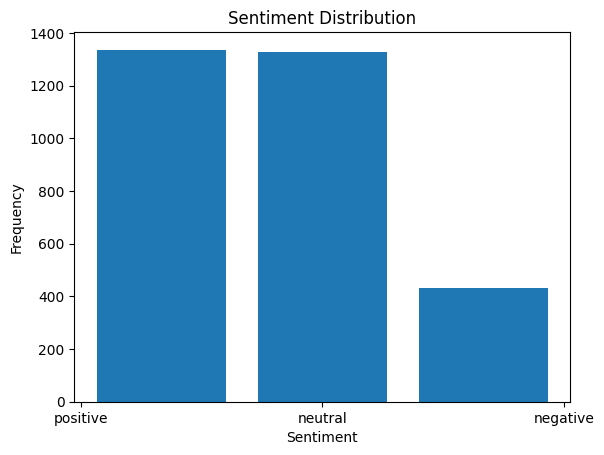

In [27]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [28]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    1769
buy     1189
sell     137
Name: count, dtype: int64

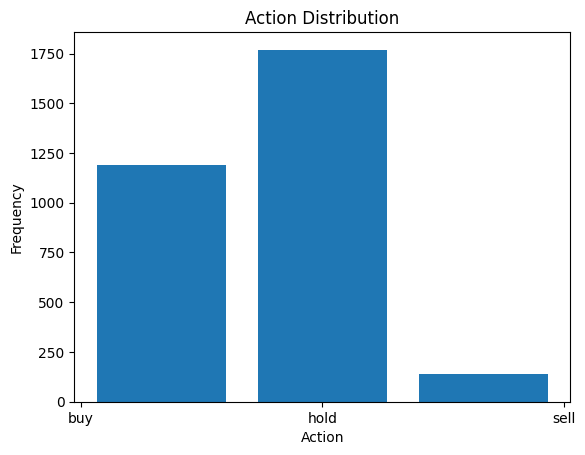

In [29]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

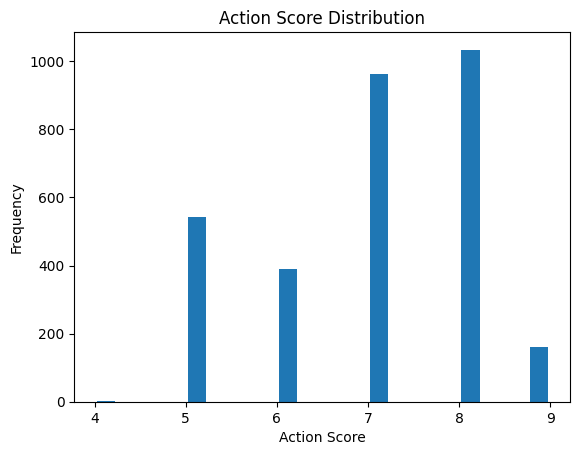

In [30]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

In [31]:
# Select the rows where both cointelegraph and reddit columns are == '[]'
empty_cointelegraph_reddit_rows = merged_daily_with_opinion[(merged_daily_with_opinion['cointelegraph'] == '[]') & (merged_daily_with_opinion['reddit'] == '[]')]
empty_cointelegraph_reddit_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
2750,2023-07-22,29940.0,30012.0,30035.0,29939.0,4.977457,497753.884761,1.668878,868041114.0,2154.850746,...,"[[599049, '2023-07-22 23:30:30', ""China's Cent...",[],29981.50,29811.25,-0.56785,same,The news reports involve allegations against f...,neutral,hold,5.0
2799,2023-09-09,25917.0,25873.0,25917.0,25872.0,6.370074,509510.723052,1.696613,891184188.0,3956.350993,...,"[[606731, '2023-09-09 22:00:44', 'Turkish Cryp...",[],25894.75,25896.25,0.005793,same,The news about Palau's government using Ripple...,positive,buy,8.0
2806,2023-09-16,26625.0,26663.0,26692.0,26605.0,33.429655,511321.542197,1.684559,895054866.0,3826.735484,...,"[[607787, '2023-09-16 23:30:37', ""Debunking Cr...",[],26646.25,26525.25,-0.454098,same,The news about Astar's partnership with Polygo...,positive,buy,8.0
2827,2023-10-07,27927.0,27931.0,27965.0,27861.0,8.805102,516533.519562,1.586042,903681819.0,1430.216374,...,"[[611203, '2023-10-07 23:30:28', 'Russian Pres...",[],27921.00,27975.25,0.194298,same,The news report details a fraud case involving...,negative,sell,9.0


In [32]:
# Show the reasoning_text, sentiment_class and action_class of these rows
for i, row in empty_cointelegraph_reddit_rows.iterrows():
    reasoning_text = merged_daily_with_opinion.loc[i, 'reasoning_text']
    sentiment_class = merged_daily_with_opinion.loc[i, 'sentiment_class']
    action_class = merged_daily_with_opinion.loc[i, 'action_class']
    print(f"Index: {i}")
    print(f"Reasoning Text: {reasoning_text}")
    print(f"Sentiment Class: {sentiment_class}")
    print(f"Action Class: {action_class}")
    print()

Index: 2750
Reasoning Text: The news reports involve allegations against former executives for misappropriation of funds which casts doubt on their actions and impacts trust in FTX. While there is potential resolution through legal proceedings that could benefit creditors, the overall sentiment towards Bitcoin remains unaffected by individual company issues.
Sentiment Class: neutral
Action Class: hold

Index: 2799
Reasoning Text: The news about Palau's government using Ripple's CBDC platform for a stablecoin pilot project indicates potential growth and innovation in the crypto space. Positive sentiment is derived from this forward-looking approach, despite no concrete details on future projects.
Sentiment Class: positive
Action Class: buy

Index: 2806
Reasoning Text: The news about Astar's partnership with Polygon for a new scaling solution indicates progress in Web3 adoption and integration into existing systems which could be positive for Bitcoin. The general tone of the Reddit posts

In [33]:
# Select only the rows that are NaN
empty_opinion_rows = merged_daily_with_opinion[(merged_daily_with_opinion['reasoning_text'] == 'None') | (merged_daily_with_opinion['sentiment_class'] == 'None') | (merged_daily_with_opinion['action_class'] == 'None')]
empty_opinion_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score


### Count the number of tokens in the 'reasoning_text' column

In [34]:
# Check if all the rows in the sentiment_class have the following values: 'positive', 'negative', 'neutral'
daily_opinion['sentiment_class'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [35]:
# Check if all the rows in the action_class have the following values: 'buy', 'sell', 'hold'
daily_opinion['action_class'].unique()

array(['buy', 'hold', 'sell'], dtype=object)

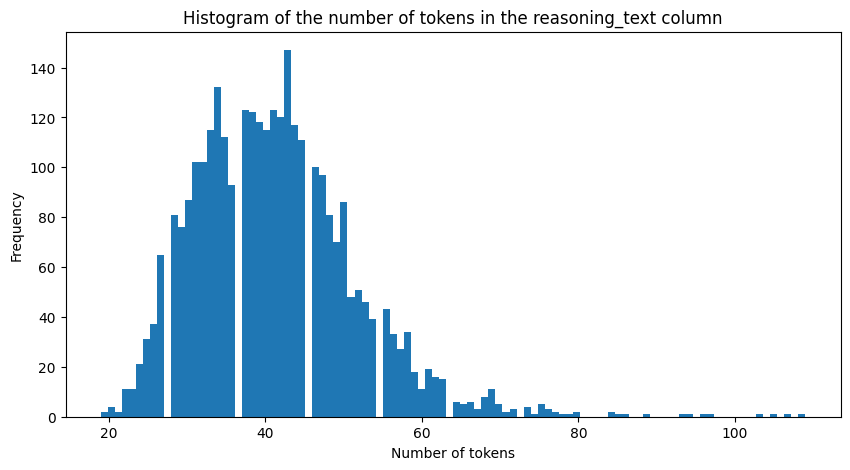

In [36]:
# Count the number of tokens in the 'reasoning_text' column and find the maximum number of tokens
merged_daily_with_opinion['num_tokens'] = merged_daily_with_opinion['reasoning_text'].apply(lambda x: len(x.split()))

# Plot the histogram of the number of tokens
plt.figure(figsize=(10, 5))
plt.hist(merged_daily_with_opinion['num_tokens'], bins=100)
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Histogram of the number of tokens in the reasoning_text column')
plt.show()


In [37]:
# Find the maximum and minimum number of tokens in the 'reasoning_text' column
max_num_tokens = merged_daily_with_opinion['num_tokens'].max()
min_num_tokens = merged_daily_with_opinion['num_tokens'].min()

print('Maximum number of tokens:', max_num_tokens)
print('Minimum number of tokens:', min_num_tokens)

Maximum number of tokens: 109
Minimum number of tokens: 19


In [38]:
# Display the reasoning_text column with the maximum number of tokens
max_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmax()
max_num_tokens_text = merged_daily_with_opinion.loc[max_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the maximum number of tokens:', max_num_tokens_text)

# Display the reasoning_text column with the minimum number of tokens
min_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmin()
min_num_tokens_text = merged_daily_with_opinion.loc[min_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the minimum number of tokens:', min_num_tokens_text)


Reasoning text with the maximum number of tokens: The Reddit posts show a strong sentiment among retail investors for buying Bitcoin during price dips. Despite past crashes and volatility in the market, there is an overall optimistic outlook as seen from comments expressing confidence to buy even at lower prices (e.g., Comment 32.1), willingness to continue purchasing despite previous cycles of dip buying (Comment 32.4), and acknowledgment that this behavior might indicate a more mature investment strategy among newcomers in the market (Comments 32.5, 32.6). However, there is also caution with comments about having no money left for further dips or being one of many following similar patterns (Comments 32.7, 32.8), suggesting some awareness of potential overextension.
Reasoning text with the minimum number of tokens: The Reddit post expresses enthusiasm about cryptocurrency investment and mentions recent purchases. This suggests optimism in Bitcoin's future value.


In [39]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
positive    1336
neutral     1328
negative     431
Name: count, dtype: int64

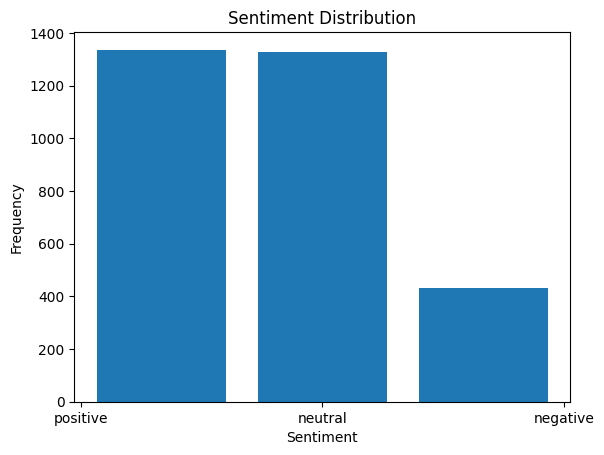

In [40]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [41]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    1769
buy     1189
sell     137
Name: count, dtype: int64

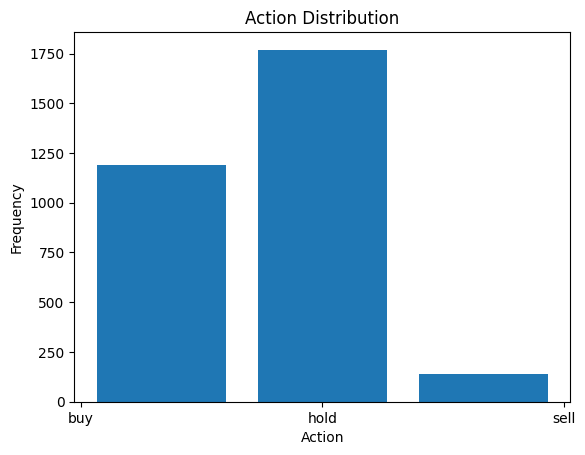

In [42]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

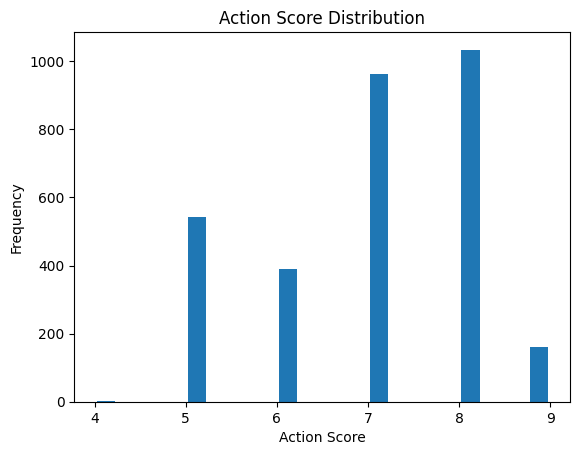

In [43]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

# Mistral NeMo

In [44]:
# Set the path to the dataset
MERGED_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv")
OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv")

In [45]:
merged_daily_with_opinion = pd.read_csv(MERGED_OPINION_DATASET_PATH)
daily_opinion = pd.read_csv(OPINION_DATASET_PATH)

In [46]:
merged_daily_with_opinion.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same,The majority of Reddit posts express excitemen...,positive,buy,9.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,"[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same,"Post 14 discusses Bitcoin's creator, Satoshi N...",neutral,hold,8.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,"[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same,The Bitcoin Foundation has reduced its expense...,neutral,hold,7.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,"[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same,The conversation discusses a theoretical scena...,neutral,hold,8.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,"[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same,The comments discuss the slow adoption of Bitc...,negative,hold,7.0


In [47]:
daily_opinion.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The majority of Reddit posts express excitemen...,positive,buy,9.0
1,"Post 14 discusses Bitcoin's creator, Satoshi N...",neutral,hold,8.0
2,The Bitcoin Foundation has reduced its expense...,neutral,hold,7.0
3,The conversation discusses a theoretical scena...,neutral,hold,8.0
4,The comments discuss the slow adoption of Bitc...,negative,hold,7.0


In [48]:
# Show nan values
merged_daily_with_opinion.isnull().sum()

timestamp                             0
open                                  0
close                                 0
high                                  0
low                                   0
volume                                0
blocks-size                           0
avg-block-size                        0
n-transactions-total                  0
n-transactions-per-block              0
hash-rate                             0
difficulty                            0
miners-revenue                        0
transaction-fees-usd                  0
n-unique-addresses                    0
n-transactions                        0
estimated-transaction-volume-usd      0
total-bitcoins                        0
market-cap                            0
fng_value                           756
fng_value_classification            756
fng_sentiment                       756
cbbi_value                            0
cbbi_sentiment                        0
cointelegraph                         0


In [49]:
# Show nan values
daily_opinion.isnull().sum()

reasoning_text     0
sentiment_class    0
action_class       0
action_score       0
dtype: int64

In [50]:
# Sobstitute the NaN values with None
merged_daily_with_opinion.fillna('None', inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_9056\1592612661.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_daily_with_opinion.fillna('None', inplace=True)


In [51]:
# Display reasoning, sentiment and action of a row
index = 0
reasoning = merged_daily_with_opinion['reasoning_text'].values[index]
sentiment = merged_daily_with_opinion['sentiment_class'].values[index]
action = merged_daily_with_opinion['action_class'].values[index]
action_score = merged_daily_with_opinion['action_score'].values[index]

print("Reasoning: ", reasoning)
print("Sentiment: ", sentiment)
print("Action: ", action)
print("Action score: ", action_score)

Reasoning:  The majority of Reddit posts express excitement about the upcoming halving event and Bitcoin's potential for growth. News articles report on institutional investments and increasing adoption, further validating Bitcoin's position in the market.
Sentiment:  positive
Action:  buy
Action score:  9.0


In [52]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
neutral     1631
negative     763
positive     701
Name: count, dtype: int64

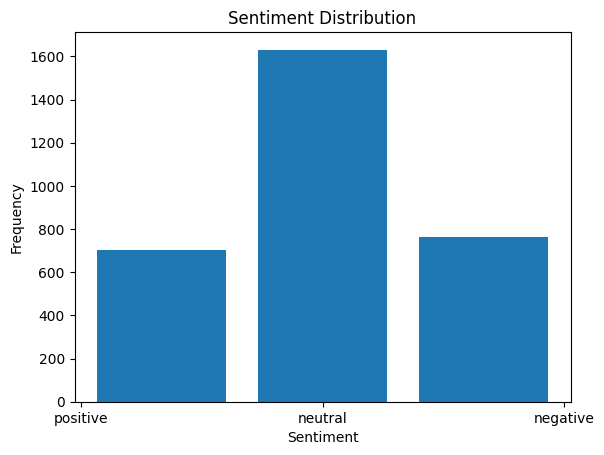

In [53]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [54]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    2536
sell     295
buy      264
Name: count, dtype: int64

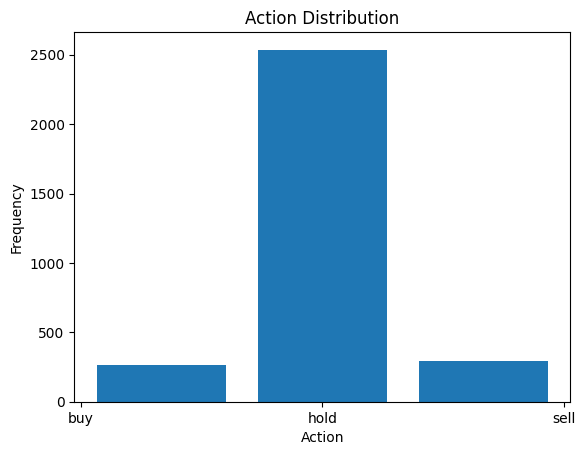

In [55]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

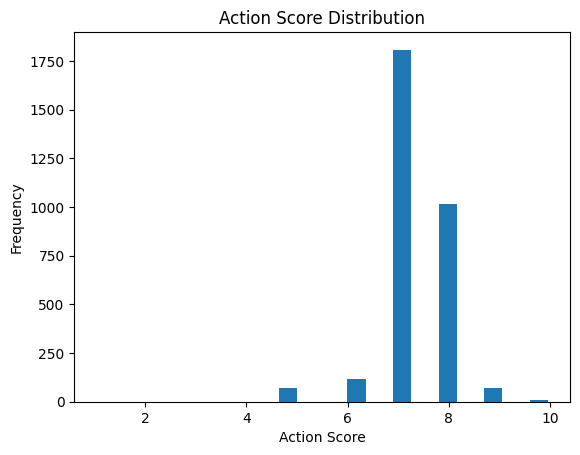

In [56]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

In [57]:
# Select the rows where both cointelegraph and reddit columns are == '[]'
empty_cointelegraph_reddit_rows = merged_daily_with_opinion[(merged_daily_with_opinion['cointelegraph'] == '[]') & (merged_daily_with_opinion['reddit'] == '[]')]
empty_cointelegraph_reddit_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
2750,2023-07-22,29940.0,30012.0,30035.0,29939.0,4.977457,497753.884761,1.668878,868041114.0,2154.850746,...,"[[599049, '2023-07-22 23:30:30', ""China's Cent...",[],29981.50,29811.25,-0.56785,same,The news reports detail fraudulent activities ...,neutral,hold,8.0
2799,2023-09-09,25917.0,25873.0,25917.0,25872.0,6.370074,509510.723052,1.696613,891184188.0,3956.350993,...,"[[606731, '2023-09-09 22:00:44', 'Turkish Cryp...",[],25894.75,25896.25,0.005793,same,The news reports that Palau's stablecoin proje...,neutral,hold,7.0
2806,2023-09-16,26625.0,26663.0,26692.0,26605.0,33.429655,511321.542197,1.684559,895054866.0,3826.735484,...,"[[607787, '2023-09-16 23:30:37', ""Debunking Cr...",[],26646.25,26525.25,-0.454098,same,The news about Astar and Polygon partnering to...,positive,hold,8.0
2827,2023-10-07,27927.0,27931.0,27965.0,27861.0,8.805102,516533.519562,1.586042,903681819.0,1430.216374,...,"[[611203, '2023-10-07 23:30:28', 'Russian Pres...",[],27921.00,27975.25,0.194298,same,"The news article discusses a crypto exchange, ...",negative,hold,8.0


In [58]:
# Show the reasoning_text, sentiment_class and action_class of these rows
for i, row in empty_cointelegraph_reddit_rows.iterrows():
    reasoning_text = merged_daily_with_opinion.loc[i, 'reasoning_text']
    sentiment_class = merged_daily_with_opinion.loc[i, 'sentiment_class']
    action_class = merged_daily_with_opinion.loc[i, 'action_class']
    print(f"Index: {i}")
    print(f"Reasoning Text: {reasoning_text}")
    print(f"Sentiment Class: {sentiment_class}")
    print(f"Action Class: {action_class}")
    print()

Index: 2750
Reasoning Text: The news reports detail fraudulent activities by former FTX executives, which is negative for Bitcoin's reputation and trust in the industry. However, it does not directly impact Bitcoin's price or technology. The Reddit posts show concern but also support for Bitcoin as a technology.
Sentiment Class: neutral
Action Class: hold

Index: 2799
Reasoning Text: The news reports that Palau's stablecoin project using Ripple's CBDC platform was extended due to popular demand, suggesting positive interest and potential success. However, Hunter Anson emphasized the temporary nature of the pilot and the need for further research before a full production program. The lack of immediate continuation plans and the pending report's outcomes create uncertainty.
Sentiment Class: neutral
Action Class: hold

Index: 2806
Reasoning Text: The news about Astar and Polygon partnering to launch a new scaling solution shows positive developments in Web3 adoption, particularly in Japan

In [59]:
# Select only the rows that are NaN
empty_opinion_rows = merged_daily_with_opinion[(merged_daily_with_opinion['reasoning_text'] == 'None') | (merged_daily_with_opinion['sentiment_class'] == 'None') | (merged_daily_with_opinion['action_class'] == 'None')]
empty_opinion_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score


### Count the number of tokens in the 'reasoning_text' column

In [60]:
# Check if all the rows in the sentiment_class have the following values: 'positive', 'negative', 'neutral'
daily_opinion['sentiment_class'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [61]:
# Check if all the rows in the action_class have the following values: 'buy', 'sell', 'hold'
daily_opinion['action_class'].unique()

array(['buy', 'hold', 'sell'], dtype=object)

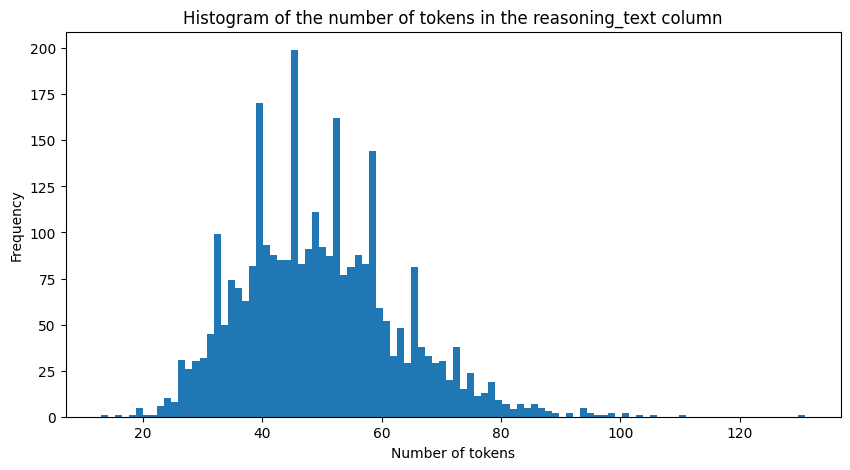

In [62]:
# Count the number of tokens in the 'reasoning_text' column and find the maximum number of tokens
merged_daily_with_opinion['num_tokens'] = merged_daily_with_opinion['reasoning_text'].apply(lambda x: len(x.split()))

# Plot the histogram of the number of tokens
plt.figure(figsize=(10, 5))
plt.hist(merged_daily_with_opinion['num_tokens'], bins=100)
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Histogram of the number of tokens in the reasoning_text column')
plt.show()


In [63]:
# Find the maximum and minimum number of tokens in the 'reasoning_text' column
max_num_tokens = merged_daily_with_opinion['num_tokens'].max()
min_num_tokens = merged_daily_with_opinion['num_tokens'].min()

print('Maximum number of tokens:', max_num_tokens)
print('Minimum number of tokens:', min_num_tokens)

Maximum number of tokens: 131
Minimum number of tokens: 13


In [64]:
# Display the reasoning_text column with the maximum number of tokens
max_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmax()
max_num_tokens_text = merged_daily_with_opinion.loc[max_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the maximum number of tokens:', max_num_tokens_text)

# Display the reasoning_text column with the minimum number of tokens
min_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmin()
min_num_tokens_text = merged_daily_with_opinion.loc[min_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the minimum number of tokens:', min_num_tokens_text)


Reasoning text with the maximum number of tokens: The news items and Reddit posts show a mix of concerns (e.g., 'Even their currency being wiped out from beneath them.', 'Glorious. On the bitcointalk thread some XVG miner turns up who went onto the Verge twitter stream for a status update and gets taken in by an ETH scam. Burnt twice in a day...') and optimism (e.g., 'Bitcoin has lightning, Ethereum will transition to PoS. Is there still a need for Cardano?', 'Legitimate question. I have been a fanboy for a long time, not even rattled by prices dropping.', 'Eth and Btc are trying to work backward to fix old issues. Cardano is able to build from the ground up, with academic vigor, a better network architecture.'). The overall sentiment is neutral as there's no overwhelmingly positive or negative news.
Reasoning text with the minimum number of tokens: No relevant information about Bitcoin in the provided news items and Reddit posts.


# Llama 3.1

In [65]:
# Set the path to the dataset
MERGED_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_daily_llama3.1_8b-instruct-q6_K_opinion.csv")
OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_llama3.1_8b-instruct-q6_K_opinion.csv")

In [66]:
merged_daily_with_opinion = pd.read_csv(MERGED_OPINION_DATASET_PATH)
daily_opinion = pd.read_csv(OPINION_DATASET_PATH)

In [67]:
merged_daily_with_opinion.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same,The text mentions that Bitcoin price will be s...,neutral,hold,7.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,"[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same,The sentiment of these information is negative...,negative,sell,8.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,"[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same,The Foundation's high expenses in 2014 and the...,negative,sell,7.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,"[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same,The text discusses a potential attack on the B...,negative,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,"[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same,The general sentiment of these information is ...,negative,sell,8.0


In [68]:
daily_opinion.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The text mentions that Bitcoin price will be s...,neutral,hold,7.0
1,The sentiment of these information is negative...,negative,sell,8.0
2,The Foundation's high expenses in 2014 and the...,negative,sell,7.0
3,The text discusses a potential attack on the B...,negative,hold,6.0
4,The general sentiment of these information is ...,negative,sell,8.0


In [69]:
# Show nan values
merged_daily_with_opinion.isnull().sum()

timestamp                             0
open                                  0
close                                 0
high                                  0
low                                   0
volume                                0
blocks-size                           0
avg-block-size                        0
n-transactions-total                  0
n-transactions-per-block              0
hash-rate                             0
difficulty                            0
miners-revenue                        0
transaction-fees-usd                  0
n-unique-addresses                    0
n-transactions                        0
estimated-transaction-volume-usd      0
total-bitcoins                        0
market-cap                            0
fng_value                           756
fng_value_classification            756
fng_sentiment                       756
cbbi_value                            0
cbbi_sentiment                        0
cointelegraph                         0


In [70]:
# Show nan values
daily_opinion.isnull().sum()

reasoning_text     0
sentiment_class    0
action_class       0
action_score       0
dtype: int64

In [71]:
# Sobstitute the NaN values with None
merged_daily_with_opinion.fillna('None', inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_9056\1592612661.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_daily_with_opinion.fillna('None', inplace=True)


In [72]:
# Display reasoning, sentiment and action of a row
index = 0
reasoning = merged_daily_with_opinion['reasoning_text'].values[index]
sentiment = merged_daily_with_opinion['sentiment_class'].values[index]
action = merged_daily_with_opinion['action_class'].values[index]
action_score = merged_daily_with_opinion['action_score'].values[index]

print("Reasoning: ", reasoning)
print("Sentiment: ", sentiment)
print("Action: ", action)
print("Action score: ", action_score)

Reasoning:  The text mentions that Bitcoin price will be stable after two spikes and might bottom out before rising again in winter 2016. The Reddit post suggests buying Stoneforge Mystic cards as they will be cheaper due to panic selling if the card is unbanned, but notes that the initial spike could be much higher than predicted.
Sentiment:  neutral
Action:  hold
Action score:  7.0


In [73]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
neutral     1360
negative    1059
positive     676
Name: count, dtype: int64

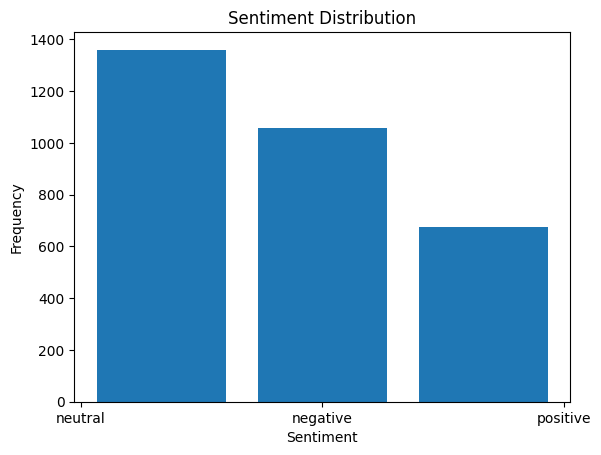

In [74]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [75]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    1880
sell     744
buy      471
Name: count, dtype: int64

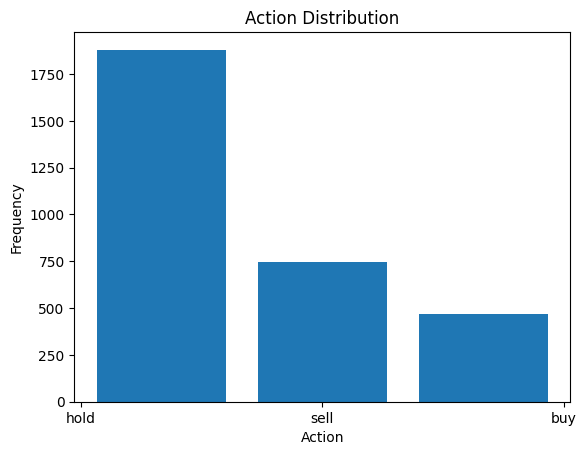

In [76]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

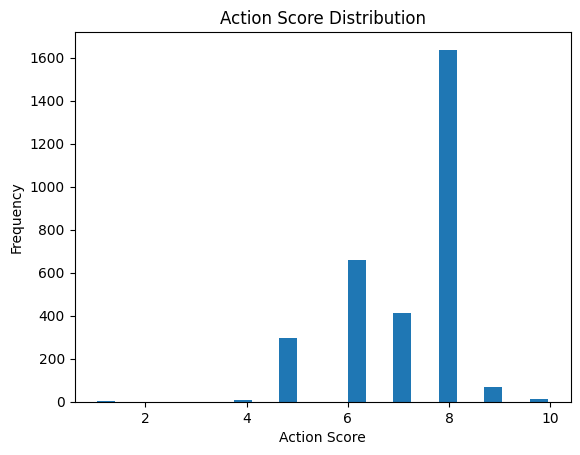

In [77]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

In [78]:
# Select the rows where both cointelegraph and reddit columns are == '[]'
empty_cointelegraph_reddit_rows = merged_daily_with_opinion[(merged_daily_with_opinion['cointelegraph'] == '[]') & (merged_daily_with_opinion['reddit'] == '[]')]
empty_cointelegraph_reddit_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
2750,2023-07-22,29940.0,30012.0,30035.0,29939.0,4.977457,497753.884761,1.668878,868041114.0,2154.850746,...,"[[599049, '2023-07-22 23:30:30', ""China's Cent...",[],29981.50,29811.25,-0.56785,same,The general sentiment is negative due to the l...,negative,sell,8.0
2799,2023-09-09,25917.0,25873.0,25917.0,25872.0,6.370074,509510.723052,1.696613,891184188.0,3956.350993,...,"[[606731, '2023-09-09 22:00:44', 'Turkish Cryp...",[],25894.75,25896.25,0.005793,same,The general sentiment of these information is ...,negative,sell,8.0
2806,2023-09-16,26625.0,26663.0,26692.0,26605.0,33.429655,511321.542197,1.684559,895054866.0,3826.735484,...,"[[607787, '2023-09-16 23:30:37', ""Debunking Cr...",[],26646.25,26525.25,-0.454098,same,The news item reports a partnership between As...,positive,buy,8.0
2827,2023-10-07,27927.0,27931.0,27965.0,27861.0,8.805102,516533.519562,1.586042,903681819.0,1430.216374,...,"[[611203, '2023-10-07 23:30:28', 'Russian Pres...",[],27921.00,27975.25,0.194298,same,The general sentiment of these information ite...,negative,sell,8.0


In [79]:
# Show the reasoning_text, sentiment_class and action_class of these rows
for i, row in empty_cointelegraph_reddit_rows.iterrows():
    reasoning_text = merged_daily_with_opinion.loc[i, 'reasoning_text']
    sentiment_class = merged_daily_with_opinion.loc[i, 'sentiment_class']
    action_class = merged_daily_with_opinion.loc[i, 'action_class']
    print(f"Index: {i}")
    print(f"Reasoning Text: {reasoning_text}")
    print(f"Sentiment Class: {sentiment_class}")
    print(f"Action Class: {action_class}")
    print()

Index: 2750
Reasoning Text: The general sentiment is negative due to the lawsuit against FTX's former executives for allegedly misappropriating over $1 billion. This suggests a lack of trust in the company's management and potential legal issues.
Sentiment Class: negative
Action Class: sell

Index: 2799
Reasoning Text: The general sentiment of these information is negative due to the fact that the stablecoin pilot in Palau has been frozen and there is no clear indication on its continuation. The government is looking forward to continuing its partnership with Ripple to refine its stablecoin's design, but this does not guarantee a positive outcome. An experienced trader would sell Bitcoin as there are concerns about the project's future and potential impact on the cryptocurrency market.
Sentiment Class: negative
Action Class: sell

Index: 2806
Reasoning Text: The news item reports a partnership between Astar Network and Polygon Labs to launch Astar zkEVM, a new Ethereum layer two scalin

In [80]:
# Select only the rows that are NaN
empty_opinion_rows = merged_daily_with_opinion[(merged_daily_with_opinion['reasoning_text'] == 'None') | (merged_daily_with_opinion['sentiment_class'] == 'None') | (merged_daily_with_opinion['action_class'] == 'None')]
empty_opinion_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score


### Count the number of tokens in the 'reasoning_text' column

In [81]:
# Check if all the rows in the sentiment_class have the following values: 'positive', 'negative', 'neutral'
daily_opinion['sentiment_class'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [82]:
# Check if all the rows in the action_class have the following values: 'buy', 'sell', 'hold'
daily_opinion['action_class'].unique()

array(['hold', 'sell', 'buy'], dtype=object)

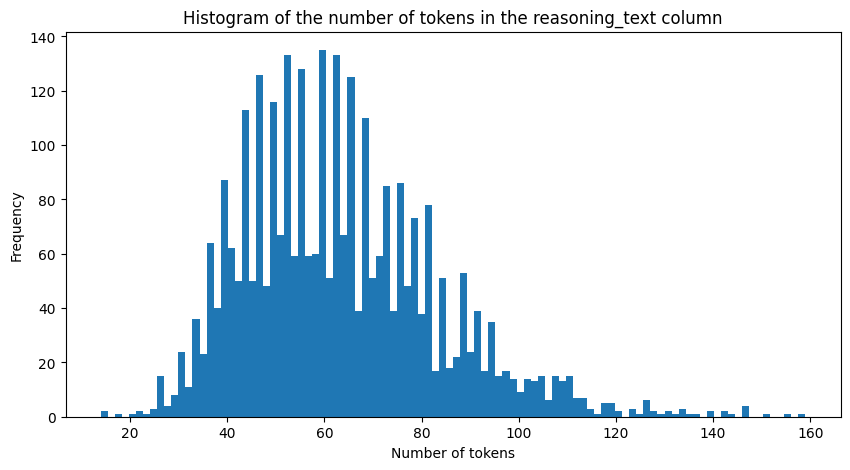

In [83]:
# Count the number of tokens in the 'reasoning_text' column and find the maximum number of tokens
merged_daily_with_opinion['num_tokens'] = merged_daily_with_opinion['reasoning_text'].apply(lambda x: len(x.split()))

# Plot the histogram of the number of tokens
plt.figure(figsize=(10, 5))
plt.hist(merged_daily_with_opinion['num_tokens'], bins=100)
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Histogram of the number of tokens in the reasoning_text column')
plt.show()


In [84]:
# Find the maximum and minimum number of tokens in the 'reasoning_text' column
max_num_tokens = merged_daily_with_opinion['num_tokens'].max()
min_num_tokens = merged_daily_with_opinion['num_tokens'].min()

print('Maximum number of tokens:', max_num_tokens)
print('Minimum number of tokens:', min_num_tokens)

Maximum number of tokens: 159
Minimum number of tokens: 14


In [85]:
# Display the reasoning_text column with the maximum number of tokens
max_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmax()
max_num_tokens_text = merged_daily_with_opinion.loc[max_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the maximum number of tokens:', max_num_tokens_text)

# Display the reasoning_text column with the minimum number of tokens
min_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmin()
min_num_tokens_text = merged_daily_with_opinion.loc[min_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the minimum number of tokens:', min_num_tokens_text)


Reasoning text with the maximum number of tokens: The general sentiment of these information is neutral as they discuss technical aspects of Bitcoin without expressing a clear opinion about its value or prospects. Reddit post 9 discusses the hypothetical fight between Blade and Selene, with the former being a skilled warrior and the latter having supernatural abilities. While this discussion is speculative and doesn't provide any concrete information about Bitcoin, it suggests that there are different opinions about the advantages and disadvantages of various characters in the Underworld series. The Reddit post 10 is a personal achievement announcement by a user who has finally acquired one full Bitcoin, which is a neutral statement. The comments on this post are also positive and encouraging. The Reddit post 11 discusses the necessity of tumbling for Bitcoin transactions, with some users expressing concerns about being tracked by law enforcement. However, this discussion is focused on

# Qwen2

In [86]:
# Set the path to the dataset
MERGED_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_daily_qwen2_7b-instruct-q8_0_opinion.csv")
OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_qwen2_7b-instruct-q8_0_opinion.csv")

In [87]:
merged_daily_with_opinion = pd.read_csv(MERGED_OPINION_DATASET_PATH)
daily_opinion = pd.read_csv(OPINION_DATASET_PATH)

In [88]:
merged_daily_with_opinion.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,"[[8955, '2016-01-01 16:00:37', 'EU Taxpayers N...","[['u/CallMeMakaveliBruh', '[VENDOR REVIEW] Psy...",429.8725,434.6250,1.105560,same,The Reddit post discusses speculative markets ...,neutral,hold,7.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,"[[8992, '2016-01-02 16:00:31', ""Got Unwanted G...","[['u/Cddoo', 'Users here now in this sub peaki...",434.6250,432.7025,-0.442335,same,The input consists of news items discussing th...,neutral,hold,7.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,"[[9057, '2016-01-03 16:00:42', 'Outernet Can B...","[['u/Aviathor', 'Happy Genesis Day!', 176, '20...",432.7025,428.2525,-1.028420,same,The news item discusses that OpenBazaar might ...,negative,sell,8.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,"[[9100, '2016-01-04 18:00:59', ""Bitcoin Ecosys...","[['u/adam3us', 'review of shelling point proto...",428.2525,433.5200,1.229999,same,"The input consists of titles, leadtexts, and b...",neutral,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,"[[25349, '2016-01-05 18:25:09', 'A comparative...","[['u/Redditcoin', 'Next milestone: Fifth credi...",433.5200,431.5700,-0.449806,same,The input contains Reddit posts discussing Bit...,negative,hold,7.0


In [89]:
daily_opinion.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The Reddit post discusses speculative markets ...,neutral,hold,7.0
1,The input consists of news items discussing th...,neutral,hold,7.0
2,The news item discusses that OpenBazaar might ...,negative,sell,8.0
3,"The input consists of titles, leadtexts, and b...",neutral,hold,6.0
4,The input contains Reddit posts discussing Bit...,negative,hold,7.0


In [90]:
# Show nan values
merged_daily_with_opinion.isnull().sum()

timestamp                             0
open                                  0
close                                 0
high                                  0
low                                   0
volume                                0
blocks-size                           0
avg-block-size                        0
n-transactions-total                  0
n-transactions-per-block              0
hash-rate                             0
difficulty                            0
miners-revenue                        0
transaction-fees-usd                  0
n-unique-addresses                    0
n-transactions                        0
estimated-transaction-volume-usd      0
total-bitcoins                        0
market-cap                            0
fng_value                           756
fng_value_classification            756
fng_sentiment                       756
cbbi_value                            0
cbbi_sentiment                        0
cointelegraph                         0


In [91]:
# Show nan values
daily_opinion.isnull().sum()

reasoning_text     0
sentiment_class    0
action_class       0
action_score       0
dtype: int64

In [92]:
# Sobstitute the NaN values with None
merged_daily_with_opinion.fillna('None', inplace=True)

C:\Users\danil\AppData\Local\Temp\ipykernel_9056\1592612661.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  merged_daily_with_opinion.fillna('None', inplace=True)


In [93]:
# Display reasoning, sentiment and action of a row
index = 0
reasoning = merged_daily_with_opinion['reasoning_text'].values[index]
sentiment = merged_daily_with_opinion['sentiment_class'].values[index]
action = merged_daily_with_opinion['action_class'].values[index]
action_score = merged_daily_with_opinion['action_score'].values[index]

print("Reasoning: ", reasoning)
print("Sentiment: ", sentiment)
print("Action: ", action)
print("Action score: ", action_score)

Reasoning:  The Reddit post discusses speculative markets and predicts a potential bubble burst scenario for Stoneforge Mystic card prices after perceived hype or speculation. The user plans on buying low if the prices drop significantly in anticipation of a market correction.
Sentiment:  neutral
Action:  hold
Action score:  7.0


In [94]:
# Count the number of positive, negative and neutral sentiments
merged_daily_with_opinion['sentiment_class'].value_counts()

sentiment_class
neutral     1795
positive     812
negative     488
Name: count, dtype: int64

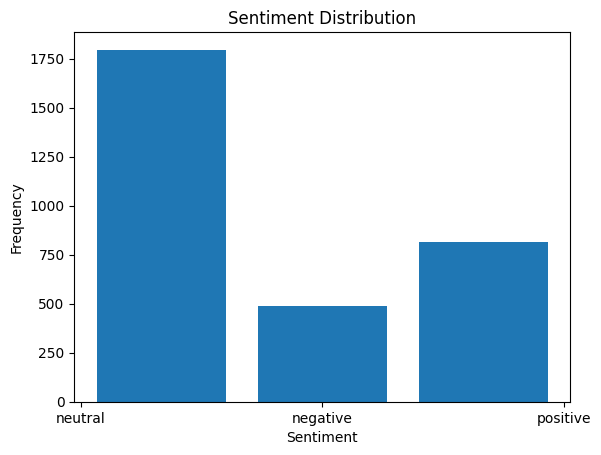

In [95]:
# Plot the sentiment distribution
plt.hist(merged_daily_with_opinion['sentiment_class'], bins=3, rwidth=0.8)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


In [96]:
# Count the number of actions
merged_daily_with_opinion['action_class'].value_counts()

action_class
hold    2744
buy      230
sell     121
Name: count, dtype: int64

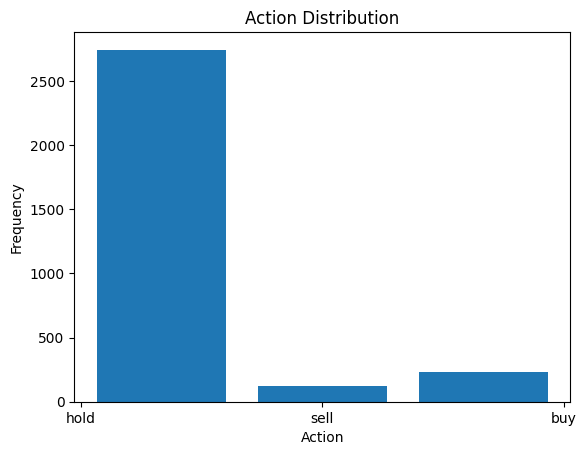

In [97]:
# Plot the action distribution
plt.hist(merged_daily_with_opinion['action_class'], bins=3, rwidth=0.8)
plt.xlabel('Action')
plt.ylabel('Frequency')
plt.title('Action Distribution')
plt.show()

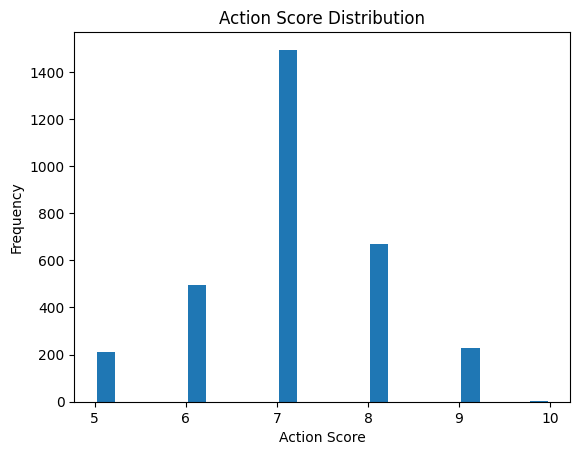

In [98]:
# Plot the action score distribution
plt.hist(merged_daily_with_opinion['action_score'], bins=20, rwidth=0.8)
plt.xlabel('Action Score')
plt.ylabel('Frequency')
plt.title('Action Score Distribution')
plt.show()

In [99]:
# Select the rows where both cointelegraph and reddit columns are == '[]'
empty_cointelegraph_reddit_rows = merged_daily_with_opinion[(merged_daily_with_opinion['cointelegraph'] == '[]') & (merged_daily_with_opinion['reddit'] == '[]')]
empty_cointelegraph_reddit_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score
2750,2023-07-22,29940.0,30012.0,30035.0,29939.0,4.977457,497753.884761,1.668878,868041114.0,2154.850746,...,"[[599049, '2023-07-22 23:30:30', ""China's Cent...",[],29981.50,29811.25,-0.56785,same,"The input contains a news item about FTX, a cr...",negative,hold,8.0
2799,2023-09-09,25917.0,25873.0,25917.0,25872.0,6.370074,509510.723052,1.696613,891184188.0,3956.350993,...,"[[606731, '2023-09-09 22:00:44', 'Turkish Cryp...",[],25894.75,25896.25,0.005793,same,The news item discusses Palau's stablecoin pro...,neutral,hold,7.0
2806,2023-09-16,26625.0,26663.0,26692.0,26605.0,33.429655,511321.542197,1.684559,895054866.0,3826.735484,...,"[[607787, '2023-09-16 23:30:37', ""Debunking Cr...",[],26646.25,26525.25,-0.454098,same,The news item discusses a partnership between ...,positive,hold,8.0
2827,2023-10-07,27927.0,27931.0,27965.0,27861.0,8.805102,516533.519562,1.586042,903681819.0,1430.216374,...,"[[611203, '2023-10-07 23:30:28', 'Russian Pres...",[],27921.00,27975.25,0.194298,same,The news item discusses a controversial plan b...,negative,hold,7.0


In [100]:
# Show the reasoning_text, sentiment_class and action_class of these rows
for i, row in empty_cointelegraph_reddit_rows.iterrows():
    reasoning_text = merged_daily_with_opinion.loc[i, 'reasoning_text']
    sentiment_class = merged_daily_with_opinion.loc[i, 'sentiment_class']
    action_class = merged_daily_with_opinion.loc[i, 'action_class']
    print(f"Index: {i}")
    print(f"Reasoning Text: {reasoning_text}")
    print(f"Sentiment Class: {sentiment_class}")
    print(f"Action Class: {action_class}")
    print()

Index: 2750
Reasoning Text: The input contains a news item about FTX, a crypto exchange, where its new CEO is attempting to recover funds misappropriated by former executives. This can be seen as negative due to potential loss of trust in the company and its management. Additionally, it implies ongoing legal issues which could impact the stability and future prospects of Bitcoin and related exchanges.
Sentiment Class: negative
Action Class: hold

Index: 2799
Reasoning Text: The news item discusses Palau's stablecoin project using Ripple's CBDC platform. While there is no definitive information on future plans, the content suggests potential for continued development and partnership with Ripple. Reddit posts include various perspectives on Bitcoin, including its utility in different contexts such as gaming (eSports) and the launch of a new ETF in Europe, which could indicate growing interest or integration into financial systems.
Sentiment Class: neutral
Action Class: hold

Index: 2806


In [101]:
# Select only the rows that are NaN
empty_opinion_rows = merged_daily_with_opinion[(merged_daily_with_opinion['reasoning_text'] == 'None') | (merged_daily_with_opinion['sentiment_class'] == 'None') | (merged_daily_with_opinion['action_class'] == 'None')]
empty_opinion_rows

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,bitcoin_news,reddit,avg_current_price,avg_next_price,pct_price_change,trend,reasoning_text,sentiment_class,action_class,action_score


### Count the number of tokens in the 'reasoning_text' column

In [102]:
# Check if all the rows in the sentiment_class have the following values: 'positive', 'negative', 'neutral'
daily_opinion['sentiment_class'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [103]:
# Check if all the rows in the action_class have the following values: 'buy', 'sell', 'hold'
daily_opinion['action_class'].unique()

array(['hold', 'sell', 'buy'], dtype=object)

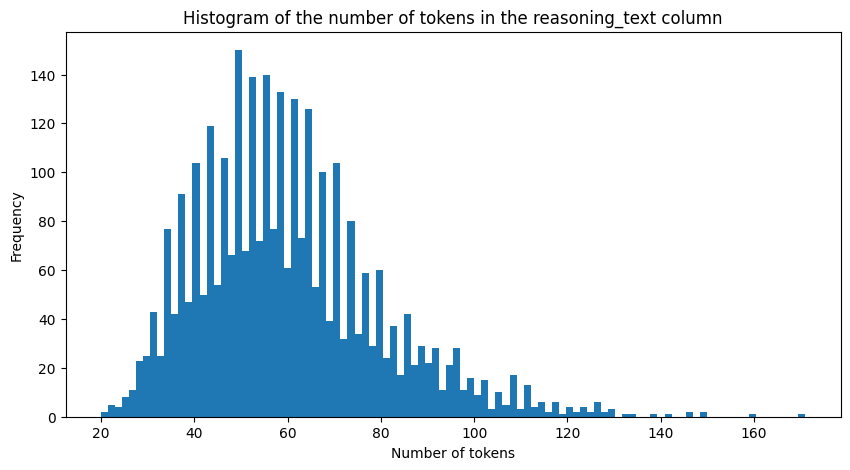

In [104]:
# Count the number of tokens in the 'reasoning_text' column and find the maximum number of tokens
merged_daily_with_opinion['num_tokens'] = merged_daily_with_opinion['reasoning_text'].apply(lambda x: len(x.split()))

# Plot the histogram of the number of tokens
plt.figure(figsize=(10, 5))
plt.hist(merged_daily_with_opinion['num_tokens'], bins=100)
plt.xlabel('Number of tokens')
plt.ylabel('Frequency')
plt.title('Histogram of the number of tokens in the reasoning_text column')
plt.show()


In [105]:
# Find the maximum and minimum number of tokens in the 'reasoning_text' column
max_num_tokens = merged_daily_with_opinion['num_tokens'].max()
min_num_tokens = merged_daily_with_opinion['num_tokens'].min()

print('Maximum number of tokens:', max_num_tokens)
print('Minimum number of tokens:', min_num_tokens)

Maximum number of tokens: 171
Minimum number of tokens: 20


In [106]:
# Display the reasoning_text column with the maximum number of tokens
max_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmax()
max_num_tokens_text = merged_daily_with_opinion.loc[max_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the maximum number of tokens:', max_num_tokens_text)

# Display the reasoning_text column with the minimum number of tokens
min_num_tokens_idx = merged_daily_with_opinion['num_tokens'].idxmin()
min_num_tokens_text = merged_daily_with_opinion.loc[min_num_tokens_idx, 'reasoning_text']
print('Reasoning text with the minimum number of tokens:', min_num_tokens_text)


Reasoning text with the maximum number of tokens: The Reddit posts suggest a mix of sentiment. Post 22.1 suggests a strategy for trading Bitcoin based on observing the order book and reacting to liquidity conditions, indicating an active trader perspective that could be neutral or positive depending on execution. Post 22.2 recommends using technical indicators like triple exponential moving averages, which could imply interest in long-term trends, possibly leaning towards a neutral stance. Post 22.3 expands on this by mentioning momentum oscillators and fast-moving averages, further suggesting interest in market dynamics but no clear sentiment beyond that. The title of post 23 indicates curiosity from mainstream audiences, potentially signaling positive sentiment as more people are interested in crypto investments. However, the concern about speculation suggests a nuanced view. Post 24 shares an interesting statistic about Bitcoin surpassing New Zealand Dollars' value, highlighting its

# Compare opinion

In [33]:
# Load the datasets
df_phi = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv"))
df_gemini = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_gemini-1.5-flash_opinion.csv"))
df_mistral = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv"))
df_llama = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_llama3.1_8b-instruct-q6_K_opinion.csv"))
df_qwen = pd.read_csv(os.path.join(ROOT, ANNOTATED_DATASET_PATH, "daily_qwen2_7b-instruct-q8_0_opinion.csv"))

In [34]:
df_phi.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The news about Bitcoin's halving event in May ...,positive,buy,8.0
1,The general sentiment from news items about Bi...,positive,buy,9.0
2,The news items highlight a decrease in expense...,neutral,hold,5.0
3,The comments from Reddit show concerns about p...,neutral,hold,7.0
4,The general sentiment in these infromations le...,negative,hold,5.0


In [35]:
df_gemini.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The news and Reddit posts are mixed. Some arti...,neutral,hold,5.0
1,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0
2,"The news and Reddit posts are mixed, with some...",negative,hold,6.0
3,The news and Reddit posts contain a mix of pos...,neutral,hold,6.0
4,"The news and Reddit posts are mixed, with some...",neutral,hold,6.0


In [36]:
df_mistral.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The majority of Reddit posts express excitemen...,positive,buy,9.0
1,"Post 14 discusses Bitcoin's creator, Satoshi N...",neutral,hold,8.0
2,The Bitcoin Foundation has reduced its expense...,neutral,hold,7.0
3,The conversation discusses a theoretical scena...,neutral,hold,8.0
4,The comments discuss the slow adoption of Bitc...,negative,hold,7.0


In [37]:
df_llama.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The text mentions that Bitcoin price will be s...,neutral,hold,7.0
1,The sentiment of these information is negative...,negative,sell,8.0
2,The Foundation's high expenses in 2014 and the...,negative,sell,7.0
3,The text discusses a potential attack on the B...,negative,hold,6.0
4,The general sentiment of these information is ...,negative,sell,8.0


In [38]:
df_qwen.head()

,reasoning_text,sentiment_class,action_class,action_score
0,The Reddit post discusses speculative markets ...,neutral,hold,7.0
1,The input consists of news items discussing th...,neutral,hold,7.0
2,The news item discusses that OpenBazaar might ...,negative,sell,8.0
3,"The input consists of titles, leadtexts, and b...",neutral,hold,6.0
4,The input contains Reddit posts discussing Bit...,negative,hold,7.0


Gemini Sentiment Frequency:
sentiment_class
negative     643
neutral     1176
positive    1276
Name: count, dtype: int64

Phi Sentiment Frequency:
sentiment_class
negative     431
neutral     1328
positive    1336
Name: count, dtype: int64

Mistral Sentiment Frequency:
sentiment_class
negative     763
neutral     1631
positive     701
Name: count, dtype: int64

Llama Sentiment Frequency:
sentiment_class
negative    1059
neutral     1360
positive     676
Name: count, dtype: int64

Qwen Sentiment Frequency:
sentiment_class
negative     488
neutral     1795
positive     812
Name: count, dtype: int64


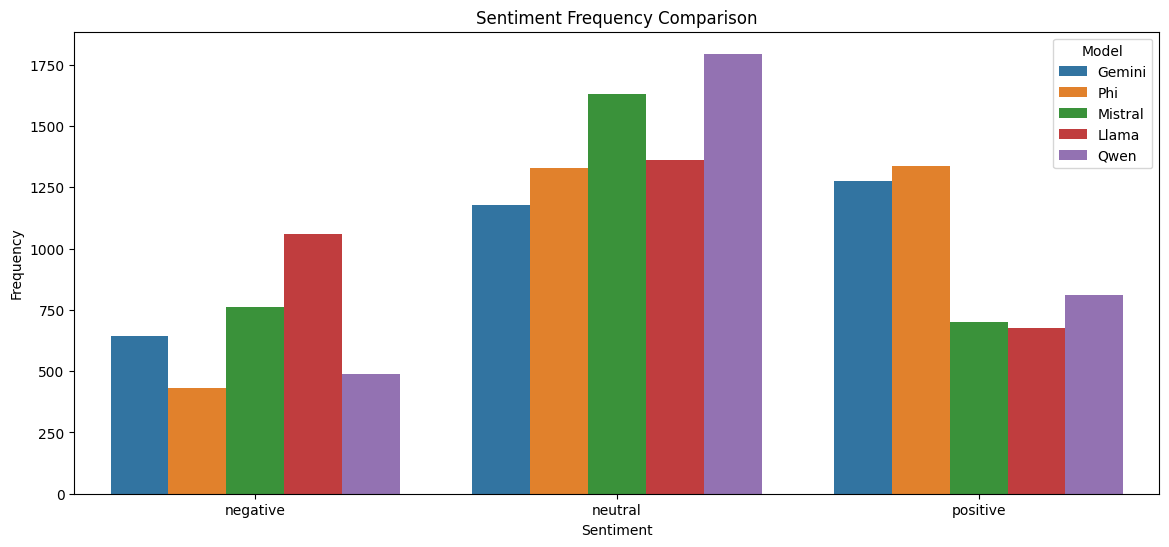

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sentiment frequency
sentiment_frequency_gemini_freq = df_gemini['sentiment_class'].value_counts().sort_index()
sentiment_frequency_phi_freq = df_phi['sentiment_class'].value_counts().sort_index()
sentiment_frequency_mistral_freq = df_mistral['sentiment_class'].value_counts().sort_index()
sentiment_frequency_llama_freq = df_llama['sentiment_class'].value_counts().sort_index()
sentiment_frequency_qwen_freq = df_qwen['sentiment_class'].value_counts().sort_index()

# Print sentiment frequency
print('Gemini Sentiment Frequency:')
print(sentiment_frequency_gemini_freq)
print('\nPhi Sentiment Frequency:')
print(sentiment_frequency_phi_freq)
print('\nMistral Sentiment Frequency:')
print(sentiment_frequency_mistral_freq)
print('\nLlama Sentiment Frequency:')
print(sentiment_frequency_llama_freq)
print('\nQwen Sentiment Frequency:')
print(sentiment_frequency_qwen_freq)

# Create a DataFrame for sentiment frequency comparison
sentiment_df_freq = pd.DataFrame({
    'Sentiment': sentiment_frequency_gemini_freq.index,
    'Gemini': sentiment_frequency_gemini_freq.values,
    'Phi': sentiment_frequency_phi_freq.values,
    'Mistral': sentiment_frequency_mistral_freq.values,
    'Llama': sentiment_frequency_llama_freq.values,
    'Qwen': sentiment_frequency_qwen_freq.values
}).melt(id_vars='Sentiment', value_vars=['Gemini', 'Phi', 'Mistral','Llama', 'Qwen'], var_name='Model', value_name='Frequency')

# Plot sentiment frequency
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.barplot(x='Sentiment', y='Frequency', hue='Model', data=sentiment_df_freq, ax=ax)
ax.set_title('Sentiment Frequency Comparison')
ax.set_ylabel('Frequency')
ax.set_xlabel('Sentiment')
ax.legend(title='Model')
plt.show()


Gemini Sentiment Percentage:
sentiment_class
negative    0.207754
neutral     0.379968
positive    0.412278
Name: proportion, dtype: float64

Phi Sentiment Percentage:
sentiment_class
negative    0.139257
neutral     0.429079
positive    0.431664
Name: proportion, dtype: float64

Mistral Sentiment Percentage:
sentiment_class
negative    0.246527
neutral     0.526979
positive    0.226494
Name: proportion, dtype: float64

Llama Sentiment Percentage:
sentiment_class
negative    0.342165
neutral     0.439418
positive    0.218417
Name: proportion, dtype: float64

Qwen Sentiment Percentage:
sentiment_class
negative    0.157674
neutral     0.579968
positive    0.262359
Name: proportion, dtype: float64


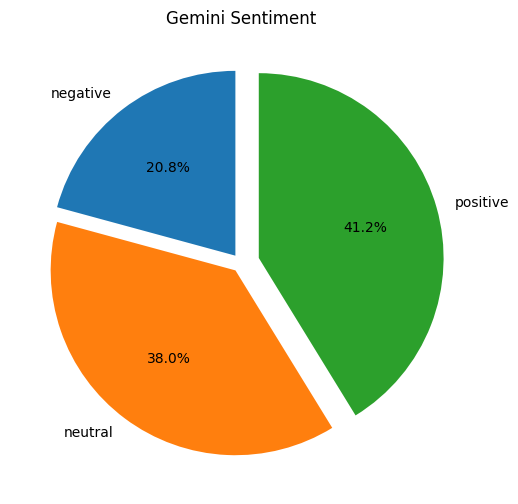

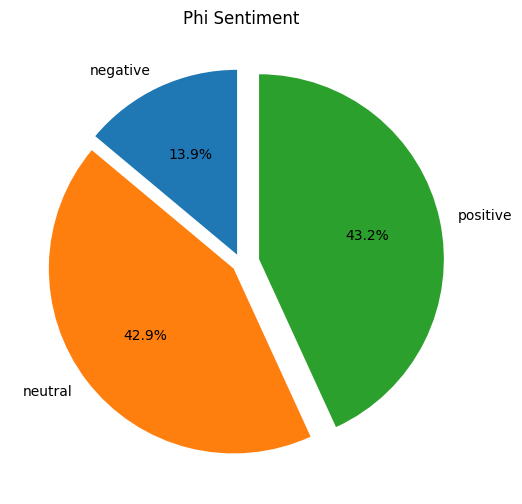

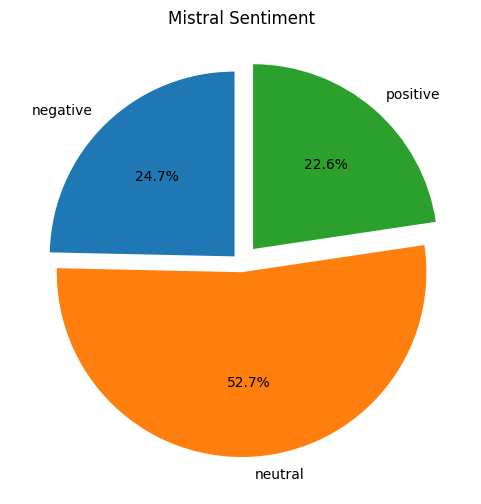

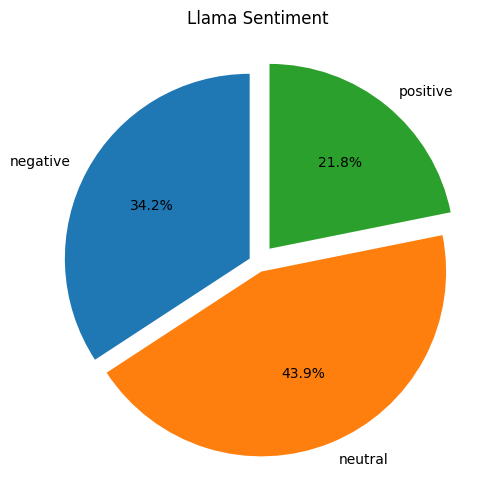

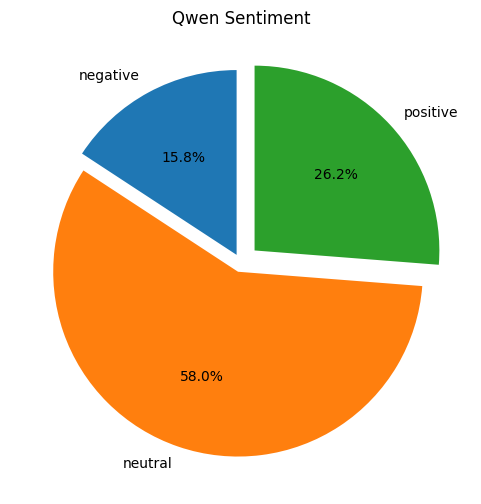

In [57]:
# Compute the percentage of positive, negative, and neutral sentiments
sentiment_percentage_gemini = df_gemini['sentiment_class'].value_counts(normalize=True).sort_index()
sentiment_percentage_phi = df_phi['sentiment_class'].value_counts(normalize=True).sort_index()
sentiment_percentage_mistral = df_mistral['sentiment_class'].value_counts(normalize=True).sort_index()
sentiment_percentage_llama = df_llama['sentiment_class'].value_counts(normalize=True).sort_index()
sentiment_percentage_qwen = df_qwen['sentiment_class'].value_counts(normalize=True).sort_index()

# Print sentiment percentage
print('Gemini Sentiment Percentage:')
print(sentiment_percentage_gemini)
print('\nPhi Sentiment Percentage:')
print(sentiment_percentage_phi)
print('\nMistral Sentiment Percentage:')
print(sentiment_percentage_mistral)
print('\nLlama Sentiment Percentage:')
print(sentiment_percentage_llama)
print('\nQwen Sentiment Percentage:')
print(sentiment_percentage_qwen)

# Define explode values for visibility of smaller segments
explode_values = (0.05, 0.05, 0.1)  # Adjust these values to explode small slices if needed

# Plot pie charts for sentiment percentage for each model in separate plots
for dataset, sentiment_percentage in zip(
    ['Gemini Sentiment', 'Phi Sentiment', 'Mistral Sentiment', 'Llama Sentiment', 'Qwen Sentiment'],
    [sentiment_percentage_gemini, sentiment_percentage_phi, sentiment_percentage_mistral, sentiment_percentage_llama, sentiment_percentage_qwen]):
    
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(sentiment_percentage, labels=sentiment_percentage.index, 
                      autopct='%1.1f%%', startangle=90, explode=explode_values)
    
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Adjust the font size for smaller percentages
    
    ax.set_title(f'{dataset}')
    plt.show()

Gemini Action Frequency:
action_class
buy      660
hold    2186
sell     249
Name: count, dtype: int64

Phi Action Frequency:
action_class
buy     1189
hold    1769
sell     137
Name: count, dtype: int64

Mistral Action Frequency:
action_class
buy      264
hold    2536
sell     295
Name: count, dtype: int64

Llama Action Frequency:
action_class
buy      471
hold    1880
sell     744
Name: count, dtype: int64

Qwen Action Frequency:
action_class
buy      230
hold    2744
sell     121
Name: count, dtype: int64


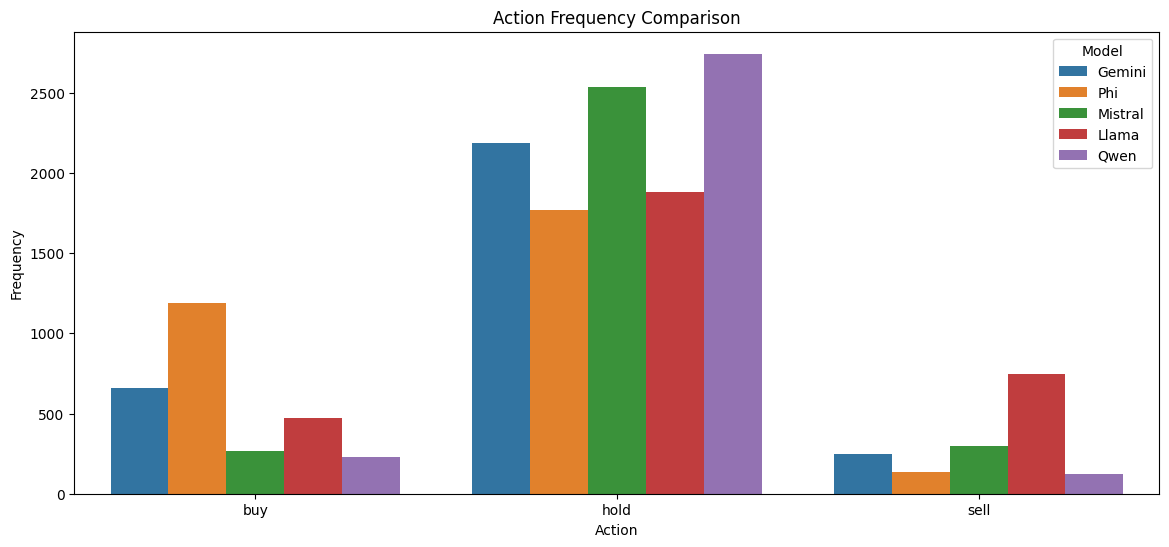

In [58]:
# Calculate action frequency
action_frequency_gemini = df_gemini['action_class'].value_counts().sort_index()
action_frequency_phi = df_phi['action_class'].value_counts().sort_index()
action_frequency_mistral = df_mistral['action_class'].value_counts().sort_index()
action_frequency_llama = df_llama['action_class'].value_counts().sort_index()
action_frequency_qwen = df_qwen['action_class'].value_counts().sort_index()

# Print action frequency
print('Gemini Action Frequency:')
print(action_frequency_gemini)
print('\nPhi Action Frequency:')
print(action_frequency_phi)
print('\nMistral Action Frequency:')
print(action_frequency_mistral)
print('\nLlama Action Frequency:')
print(action_frequency_llama)
print('\nQwen Action Frequency:')
print(action_frequency_qwen)

# Create a DataFrame for action frequency comparison
action_df = pd.DataFrame({
    'Action': action_frequency_gemini.index,
    'Gemini': action_frequency_gemini.values,
    'Phi': action_frequency_phi.values,
    'Mistral': action_frequency_mistral.values,
    'Llama': action_frequency_llama.values,
    'Qwen': action_frequency_qwen.values
}).melt(id_vars='Action', value_vars=['Gemini', 'Phi', 'Mistral','Llama', 'Qwen'], var_name='Model', value_name='Frequency')

# Plot action frequency
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.barplot(x='Action', y='Frequency', hue='Model', data=action_df, ax=ax)
ax.set_title('Action Frequency Comparison')
ax.set_ylabel('Frequency')
ax.set_xlabel('Action')
ax.legend(title='Model')
plt.show()

Gemini Action Percentage:
action_class
buy     0.213247
hold    0.706300
sell    0.080452
Name: proportion, dtype: float64

Phi Action Percentage:
action_class
buy     0.384168
hold    0.571567
sell    0.044265
Name: proportion, dtype: float64

Mistral Action Percentage:
action_class
buy     0.085299
hold    0.819386
sell    0.095315
Name: proportion, dtype: float64

Llama Action Percentage:
action_class
buy     0.152181
hold    0.607431
sell    0.240388
Name: proportion, dtype: float64

Qwen Action Percentage:
action_class
buy     0.074313
hold    0.886591
sell    0.039095
Name: proportion, dtype: float64


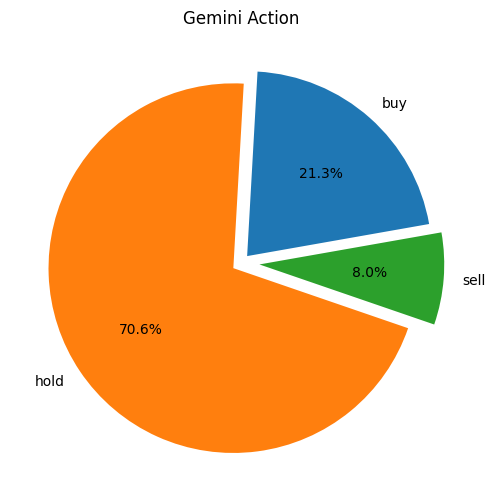

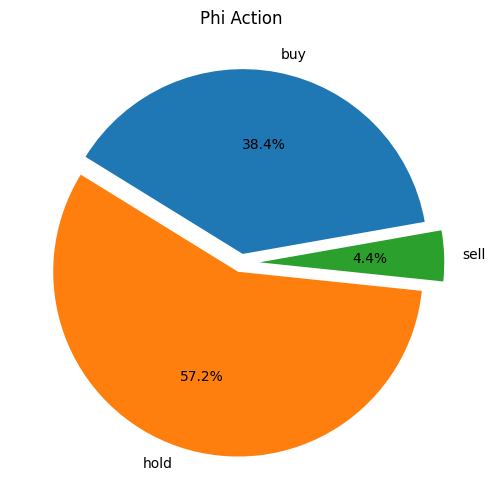

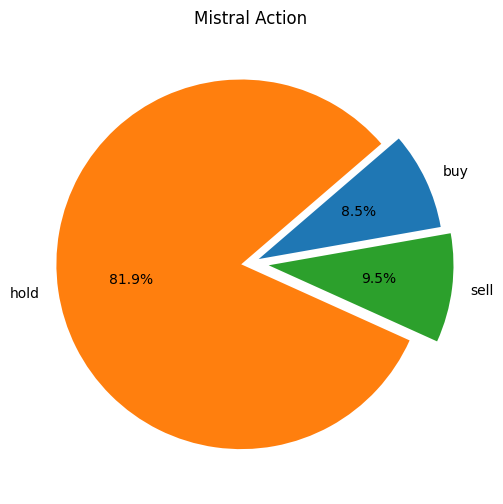

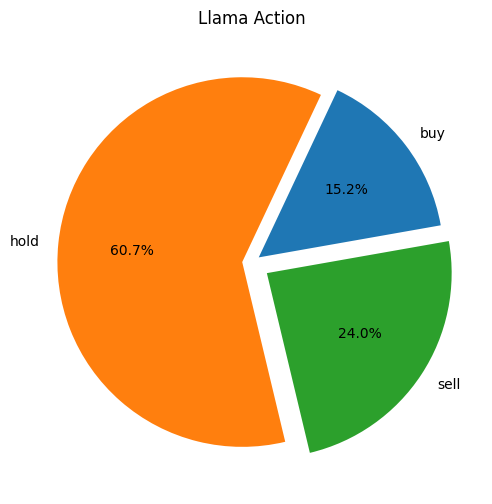

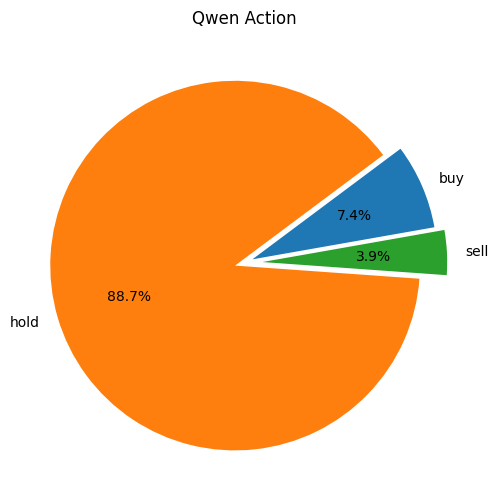

In [59]:
# Compute the percentage of buy, sell, and hold actions
action_percentage_gemini = df_gemini['action_class'].value_counts(normalize=True).sort_index()
action_percentage_phi = df_phi['action_class'].value_counts(normalize=True).sort_index()
action_percentage_mistral = df_mistral['action_class'].value_counts(normalize=True).sort_index()
action_percentage_llama = df_llama['action_class'].value_counts(normalize=True).sort_index()
action_percentage_qwen = df_qwen['action_class'].value_counts(normalize=True).sort_index()

# Print action percentage
print('Gemini Action Percentage:')
print(action_percentage_gemini)
print('\nPhi Action Percentage:')
print(action_percentage_phi)
print('\nMistral Action Percentage:')
print(action_percentage_mistral)
print('\nLlama Action Percentage:')
print(action_percentage_llama)
print('\nQwen Action Percentage:')
print(action_percentage_qwen)

# Define explode values for visibility of smaller segments
explode_values = (0.05, 0.05, 0.1)  # Adjust these values to explode small slices if needed

# Plot pie charts for sentiment percentage for each model in separate plots
for dataset, action_percentage in zip(
    ['Gemini Action', 'Phi Action', 'Mistral Action', 'Llama Action', 'Qwen Action'],
    [action_percentage_gemini, action_percentage_phi, action_percentage_mistral, action_percentage_llama, action_percentage_qwen]):
    
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(action_percentage, labels=action_percentage.index, 
                      autopct='%1.1f%%', startangle=10, explode=explode_values)
    
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Adjust the font size for smaller percentages
    
    ax.set_title(f'{dataset}')
    plt.show()

Gemini Correlation between Sentiment and Action:
0.4963186271983972

Phi Correlation between Sentiment and Action:
0.519585754191224

Mistral Correlation between Sentiment and Action:
0.12338328529496907

Llama Correlation between Sentiment and Action:
-0.052661901480417404

Qwen Correlation between Sentiment and Action:
0.4515791584390507


C:\Users\danil\AppData\Local\Temp\ipykernel_37696\382564152.py:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\danil\AppData\Local\Temp\ipykernel_37696\382564152.py:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\danil\AppData\Local\Temp\ipykernel_37696\382564152.py:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

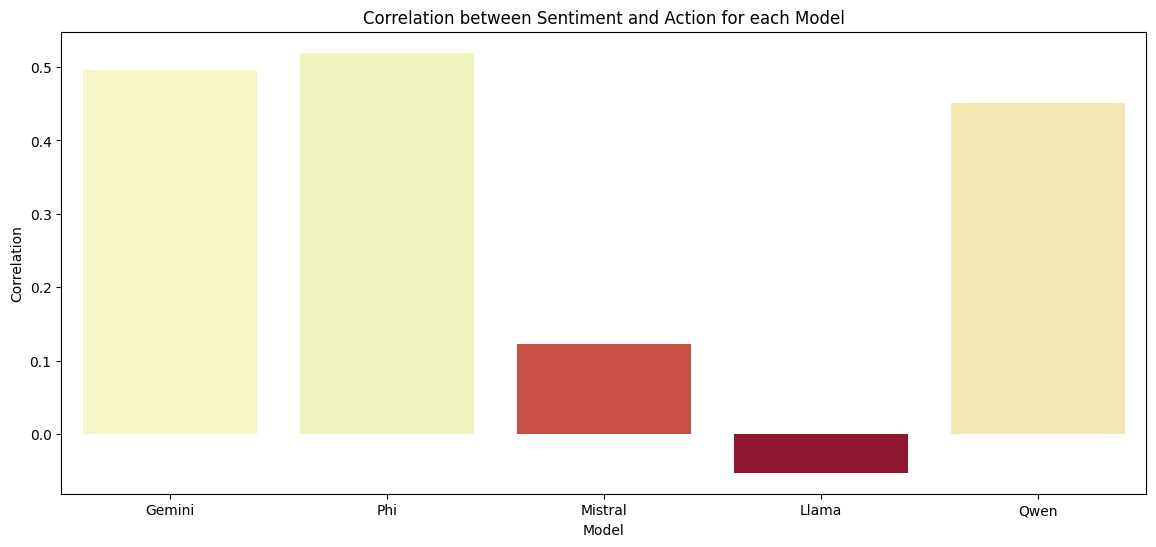

In [63]:
# Correlation between sentiment and action: what is the correlation between sentiment and action for each model?
# We will calculate the correlation between sentiment and action for each model using the 'sentiment_class' and 'action_score' columns
# We will replace the sentiment classes with numerical values: 'positive' -> 1, 'negative' -> -1, 'neutral' -> 0
# We will then calculate the correlation between the numerical sentiment values and the 'action_score' column
# The correlation values will be between -1 and 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, and 1 indicates a strong positive correlation
sentiment_action_corr_gemini = df_gemini['sentiment_class'].replace({'positive': 1, 'negative': -1, 'neutral': 0}).corr(df_gemini['action_score'])
sentiment_action_corr_phi = df_phi['sentiment_class'].replace({'positive': 1, 'negative': -1, 'neutral': 0}).corr(df_phi['action_score'])
sentiment_action_corr_mistral = df_mistral['sentiment_class'].replace({'positive': 1, 'negative': -1, 'neutral': 0}).corr(df_mistral['action_score'])
sentiment_action_corr_llama = df_llama['sentiment_class'].replace({'positive': 1, 'negative': -1, 'neutral': 0}).corr(df_llama['action_score'])
sentiment_action_corr_qwen = df_qwen['sentiment_class'].replace({'positive': 1, 'negative': -1, 'neutral': 0}).corr(df_qwen['action_score'])

# Print correlation between sentiment and action
print('Gemini Correlation between Sentiment and Action:')
print(sentiment_action_corr_gemini)
print('\nPhi Correlation between Sentiment and Action:')
print(sentiment_action_corr_phi)
print('\nMistral Correlation between Sentiment and Action:')
print(sentiment_action_corr_mistral)
print('\nLlama Correlation between Sentiment and Action:')
print(sentiment_action_corr_llama)
print('\nQwen Correlation between Sentiment and Action:')
print(sentiment_action_corr_qwen)

# Plot the correlation between sentiment and action for each model with color gradient
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
colors = sns.color_palette("RdYlGn", as_cmap=True)([sentiment_action_corr_gemini, sentiment_action_corr_phi, sentiment_action_corr_mistral, sentiment_action_corr_llama, sentiment_action_corr_qwen])
sns.barplot(x=['Gemini', 'Phi', 'Mistral', 'Llama', 'Qwen'], y=[sentiment_action_corr_gemini, sentiment_action_corr_phi, sentiment_action_corr_mistral, sentiment_action_corr_llama, sentiment_action_corr_qwen], palette=colors, ax=ax)
ax.set_title('Correlation between Sentiment and Action for each Model')
ax.set_ylabel('Correlation')
ax.set_xlabel('Model')
plt.show()

In [64]:
# Calculate the mean, median and standard deviation of the action score for each model
action_score_gemini = df_gemini['action_score']
action_score_phi = df_phi['action_score']
action_score_mistral = df_mistral['action_score']
action_score_llama = df_llama['action_score']
action_score_qwen = df_qwen['action_score']

action_score_statistics = pd.DataFrame({
    'Model': ['Gemini', 'Phi', 'Mistral', 'Llama', 'Qwen'],
    'Mean': [action_score_gemini.mean(), action_score_phi.mean(), action_score_mistral.mean(), action_score_llama.mean(), action_score_qwen.mean()],
    'Median': [action_score_gemini.median(), action_score_phi.median(), action_score_mistral.median(), action_score_llama.median(), action_score_qwen.median()],
    'Standard Deviation': [action_score_gemini.std(), action_score_phi.std(), action_score_mistral.std(), action_score_llama.std(), action_score_qwen.std()]
})

action_score_statistics

,Model,Mean,Median,Standard Deviation
0,Gemini,6.826171,6.0,1.037824
1,Phi,6.958320,7.0,1.173620
2,Mistral,7.293053,7.0,0.713070
3,Llama,7.165751,8.0,1.126167
4,Qwen,7.070436,7.0,0.970250


Gemini Action Score Frequency:
action_score
0        0
1        0
2        0
3        0
4        0
5      109
6     1450
7      609
8      726
9      199
10       2
Name: count, dtype: int64

Phi Action Score Frequency:
action_score
0        0
1        0
2        0
3        0
4        3
5      543
6      390
7      964
8     1034
9      161
10       0
Name: count, dtype: int64

Mistral Action Score Frequency:
action_score
0        0
1        1
2        0
3        1
4        1
5       72
6      118
7     1807
8     1016
9       71
10       8
Name: count, dtype: int64

Llama Action Score Frequency:
action_score
0        0
1        2
2        1
3        0
4        7
5      296
6      661
7      413
8     1637
9       67
10      11
Name: count, dtype: int64

Qwen Action Score Frequency:
action_score
0        0
1        0
2        0
3        0
4        0
5      209
6      494
7     1494
8      668
9      228
10       2
Name: count, dtype: int64


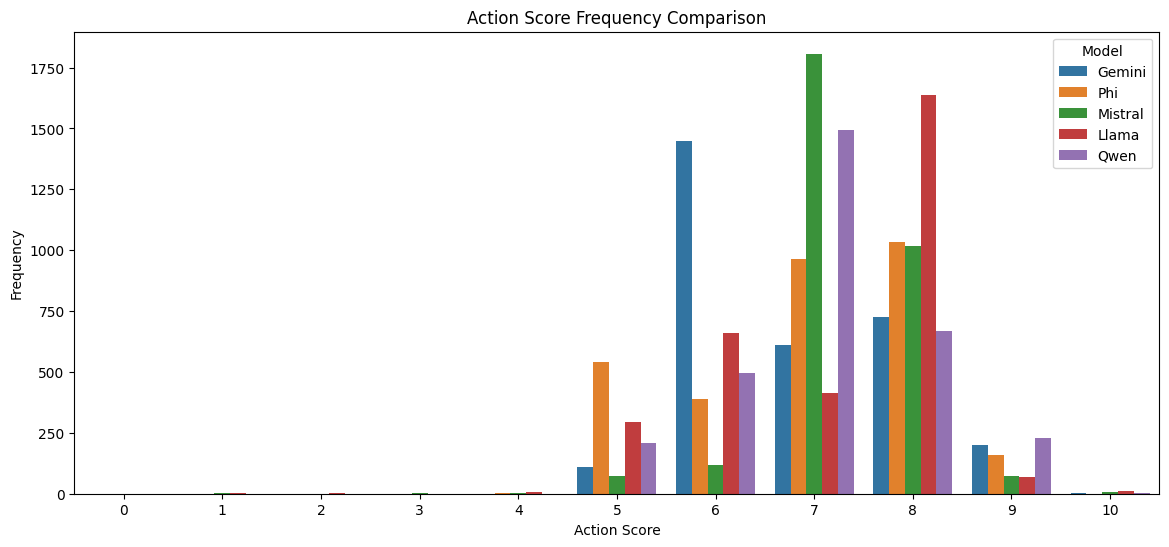

In [65]:
# Plot the action score frequency 
action_score_frequency_gemini = df_gemini['action_score'].value_counts().sort_index()
action_score_frequency_phi = df_phi['action_score'].value_counts().sort_index()
action_score_frequency_mistral = df_mistral['action_score'].value_counts().sort_index()
action_score_frequency_llama = df_llama['action_score'].value_counts().sort_index()
action_score_frequency_qwen = df_qwen['action_score'].value_counts().sort_index()

# Fill the missing action scores with 0
action_score_frequency_gemini = action_score_frequency_gemini.reindex(range(0, 11), fill_value=0)
action_score_frequency_phi = action_score_frequency_phi.reindex(range(0, 11), fill_value=0)
action_score_frequency_mistral = action_score_frequency_mistral.reindex(range(0, 11), fill_value=0)
action_score_frequency_llama = action_score_frequency_llama.reindex(range(0, 11), fill_value=0)
action_score_frequency_qwen = action_score_frequency_qwen.reindex(range(0, 11), fill_value=0)

# Print action score frequency
print('Gemini Action Score Frequency:')
print(action_score_frequency_gemini)
print('\nPhi Action Score Frequency:')
print(action_score_frequency_phi)
print('\nMistral Action Score Frequency:')
print(action_score_frequency_mistral)
print('\nLlama Action Score Frequency:')
print(action_score_frequency_llama)
print('\nQwen Action Score Frequency:')
print(action_score_frequency_qwen)

# Create a DataFrame for action score frequency comparison
action_score_df = pd.DataFrame({
    'Action Score': action_score_frequency_gemini.index,
    'Gemini': action_score_frequency_gemini.values,
    'Phi': action_score_frequency_phi.values,
    'Mistral': action_score_frequency_mistral.values,
    'Llama': action_score_frequency_llama.values,
    'Qwen': action_score_frequency_qwen.values
}).melt(id_vars='Action Score', value_vars=['Gemini', 'Phi', 'Mistral','Llama', 'Qwen'], var_name='Model', value_name='Frequency')

# Plot action score frequency
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.barplot(x='Action Score', y='Frequency', hue='Model', data=action_score_df, ax=ax)
ax.set_title('Action Score Frequency Comparison')
ax.set_ylabel('Frequency')
ax.set_xlabel('Action Score')
ax.legend(title='Model')
plt.show()


In [45]:
# Get the top 10 words in reasoning_text

from collections import Counter
import re

# Define a function to get the top words in the reasoning_text column
def get_top_words(df, column, top_n=10):
    # Combine all the reasoning texts into a single string
    text = ' '.join(df[column].values)
    
    # Tokenize the text
    tokens = re.findall(r'\b\w+\b', text.lower())
    
    # Count the frequency of each token
    word_freq = Counter(tokens)
    
    # Get the top n words
    top_words = word_freq.most_common(top_n)
    
    return top_words

top_words_gemini = get_top_words(df_gemini, 'reasoning_text', top_n=10)
top_words_phi = get_top_words(df_phi, 'reasoning_text', top_n=10)
top_words_mistral = get_top_words(df_mistral, 'reasoning_text', top_n=10)
top_words_llama = get_top_words(df_llama, 'reasoning_text', top_n=10)
top_words_qwen = get_top_words(df_qwen, 'reasoning_text', top_n=10)

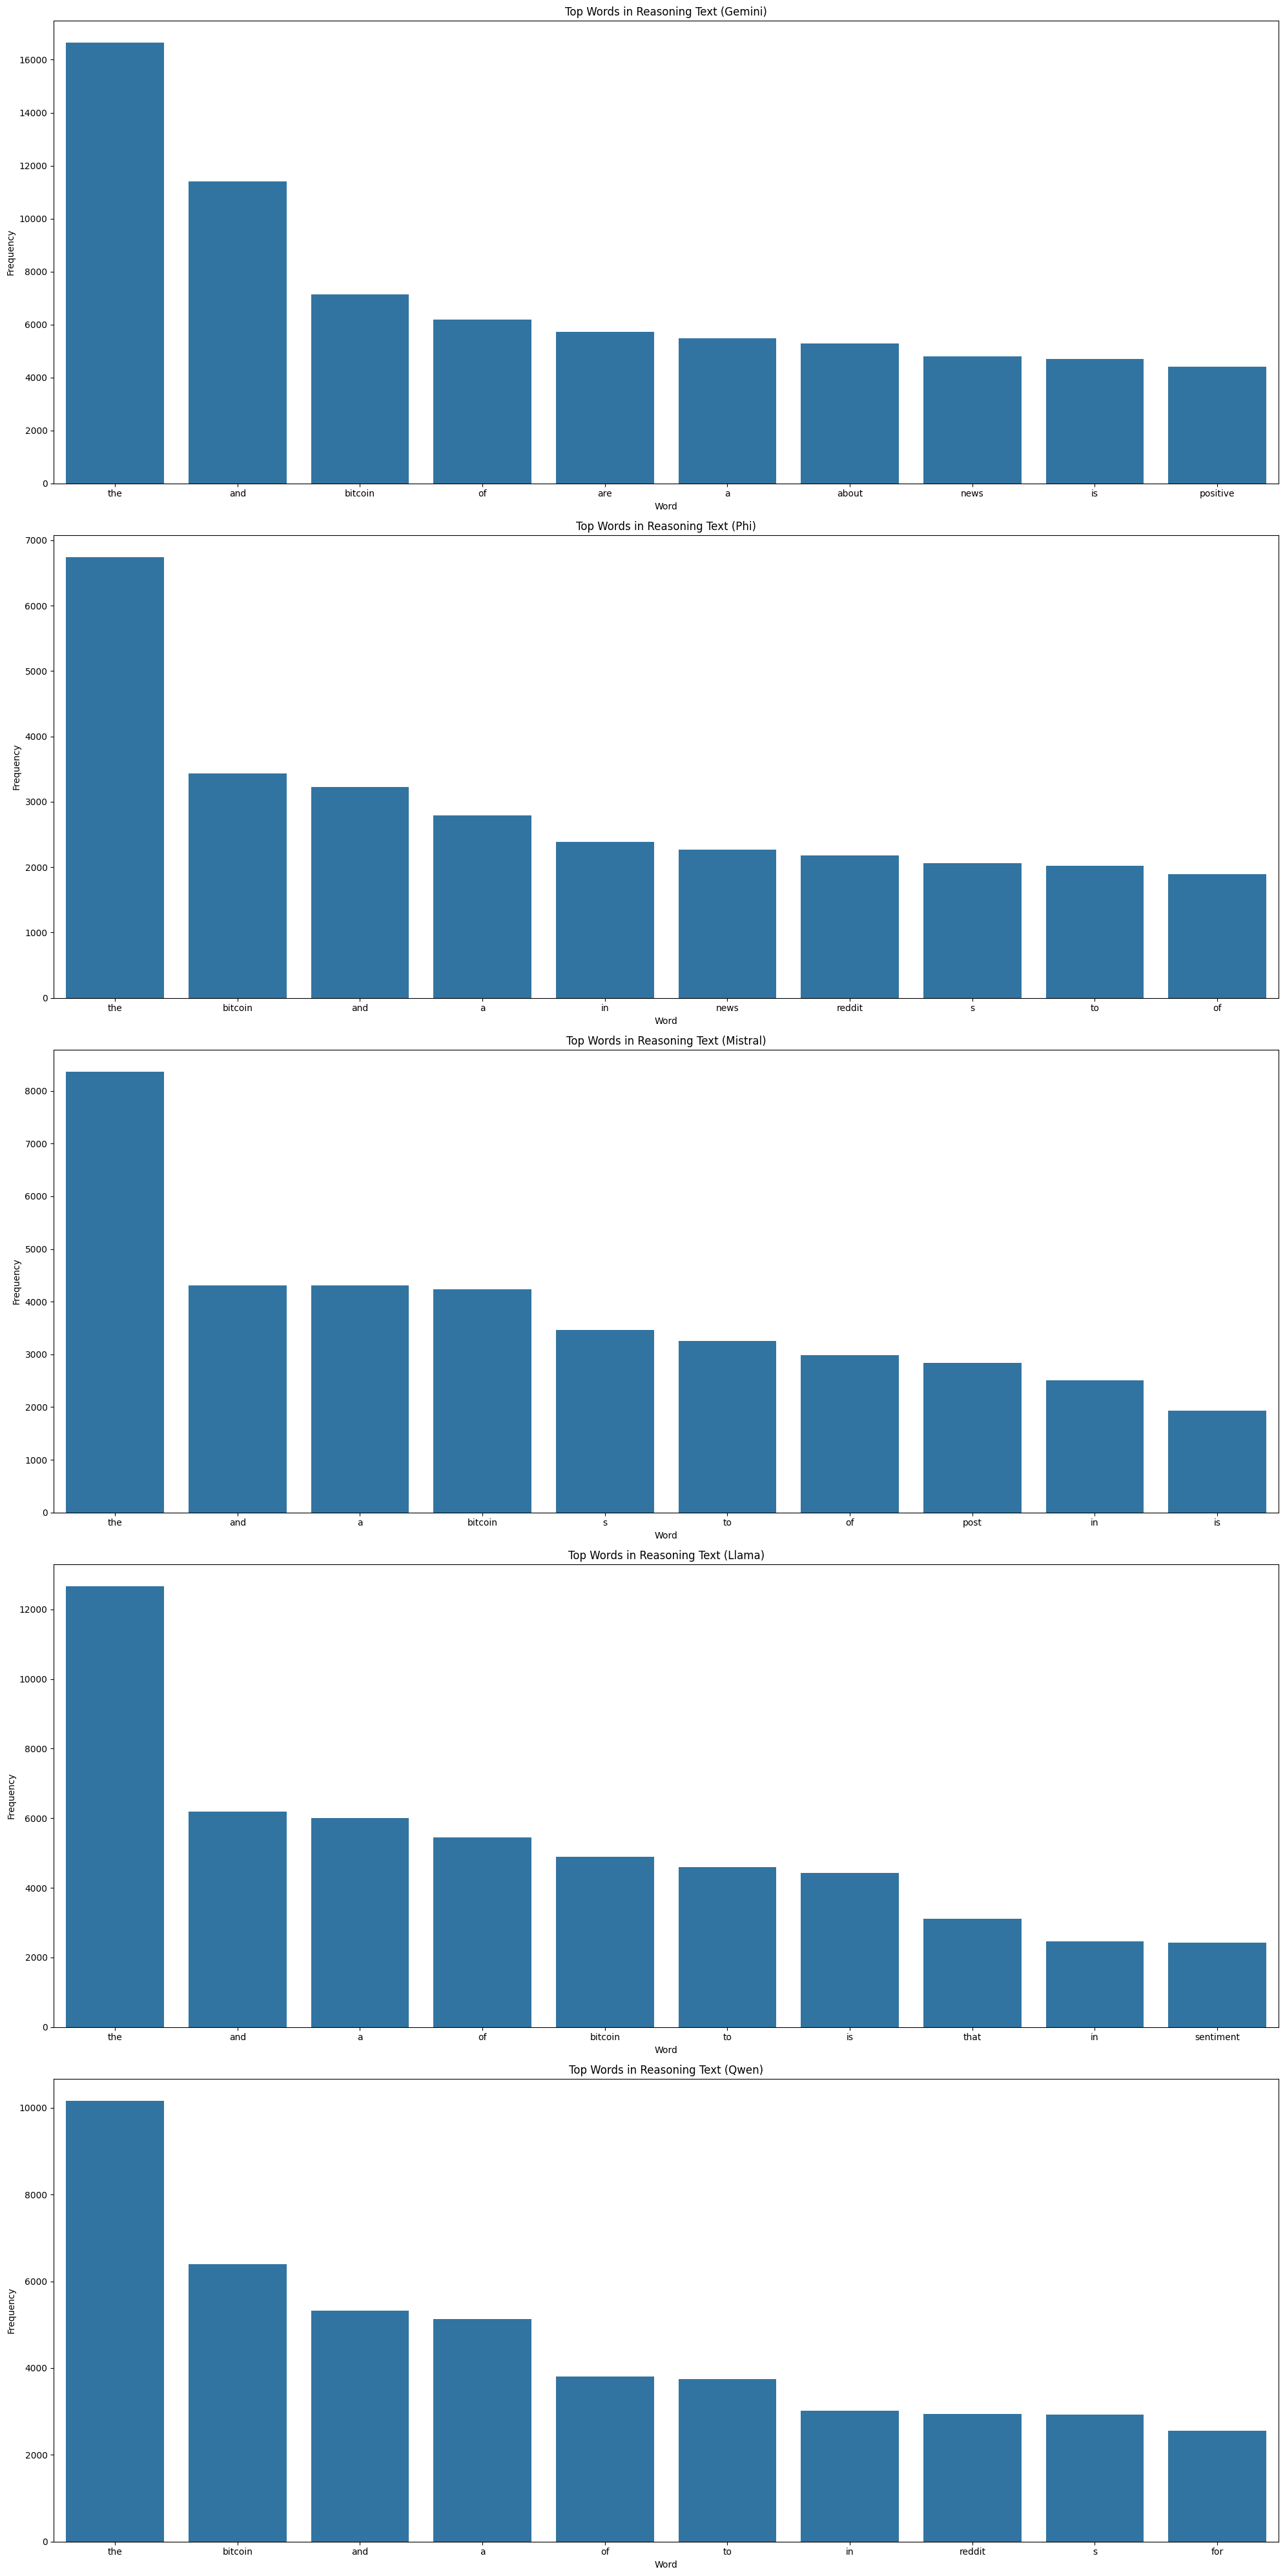

In [46]:
# Plot the top words in the reasoning_text column
fig, ax = plt.subplots(5, 1, figsize=(20, 40))
sns.barplot(x=[word[0] for word in top_words_gemini], y=[word[1] for word in top_words_gemini], ax=ax[0])
ax[0].set_title('Top Words in Reasoning Text (Gemini)')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Word')

sns.barplot(x=[word[0] for word in top_words_phi], y=[word[1] for word in top_words_phi], ax=ax[1])
ax[1].set_title('Top Words in Reasoning Text (Phi)')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Word')

sns.barplot(x=[word[0] for word in top_words_mistral], y=[word[1] for word in top_words_mistral], ax=ax[2])
ax[2].set_title('Top Words in Reasoning Text (Mistral)')
ax[2].set_ylabel('Frequency')
ax[2].set_xlabel('Word')

sns.barplot(x=[word[0] for word in top_words_llama], y=[word[1] for word in top_words_llama], ax=ax[3])
ax[3].set_title('Top Words in Reasoning Text (Llama)')
ax[3].set_ylabel('Frequency')
ax[3].set_xlabel('Word')

sns.barplot(x=[word[0] for word in top_words_qwen], y=[word[1] for word in top_words_qwen], ax=ax[4])
ax[4].set_title('Top Words in Reasoning Text (Qwen)')
ax[4].set_ylabel('Frequency')
ax[4].set_xlabel('Word')

plt.tight_layout()
plt.show()

# Focus on "Action"

In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [48]:
# Set the path to the dataset
MERGED_GEMINI_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_gemini-1.5-flash_opinion.csv")
MERGED_PHI_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_phi3_3.8b-mini-128k-instruct-q8_0_opinion.csv")
MERGED_MISTRAL_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_mistral-nemo_12b-instruct-2407-q5_K_S_opinion.csv")
MERGED_LLAMA_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_llama3.1_8b-instruct-q6_K_opinion.csv")
MERGED_QWEN_OPINION_DATASET_PATH = os.path.join(ROOT, ANNOTATED_DATASET_PATH, "merged_no_text_daily_qwen2_7b-instruct-q8_0_opinion.csv")

In [49]:
gemini = pd.read_csv(MERGED_GEMINI_OPINION_DATASET_PATH)
phi = pd.read_csv(MERGED_PHI_OPINION_DATASET_PATH)
mistral = pd.read_csv(MERGED_MISTRAL_OPINION_DATASET_PATH)
llama = pd.read_csv(MERGED_LLAMA_OPINION_DATASET_PATH)
qwen = pd.read_csv(MERGED_QWEN_OPINION_DATASET_PATH)

In [50]:
gemini.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,neutral,hold,5.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,neutral,hold,6.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,negative,hold,6.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,neutral,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,neutral,hold,6.0


In [51]:
phi.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,positive,buy,8.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,positive,buy,9.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,neutral,hold,5.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,neutral,hold,7.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,negative,hold,5.0


In [52]:
mistral.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,positive,buy,9.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,neutral,hold,8.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,neutral,hold,7.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,neutral,hold,8.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,negative,hold,7.0


In [53]:
llama.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,neutral,hold,7.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,negative,sell,8.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,negative,sell,7.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,negative,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,negative,sell,8.0


In [54]:
qwen.head()

,timestamp,open,close,high,low,volume,blocks-size,avg-block-size,n-transactions-total,n-transactions-per-block,...,fng_sentiment,cbbi_value,cbbi_sentiment,avg_current_price,avg_next_price,pct_price_change,trend,sentiment_class,action_class,action_score
0,2016-01-01,429.17,429.74,431.41,429.17,163.677972,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.29,negative,429.8725,434.6250,1.105560,same,neutral,hold,7.0
1,2016-01-02,433.89,434.92,435.80,433.89,808.207780,54604.791735,0.493407,101155706.0,919.200000,...,NaN,0.30,negative,434.6250,432.7025,-0.442335,same,neutral,hold,7.0
2,2016-01-03,432.66,432.81,433.07,432.27,41.080683,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,432.7025,428.2525,-1.028420,same,negative,sell,8.0
3,2016-01-04,428.63,427.58,429.30,427.50,487.587933,54754.876205,0.554656,101427625.0,983.503448,...,NaN,0.30,negative,428.2525,433.5200,1.229999,same,neutral,hold,6.0
4,2016-01-05,432.61,434.15,434.91,432.41,248.305703,54936.400034,0.641779,101752002.0,1161.598726,...,NaN,0.30,negative,433.5200,431.5700,-0.449806,same,negative,hold,7.0


### Analyze LLM sentiment/action

In [72]:
# Create a 2D array to store the counts
trends = ['up', 'same', 'down']
actions = ['buy', 'hold', 'sell']

gemini_count = np.zeros((3, 3))
phi_count = np.zeros((3, 3))
mistral_count = np.zeros((3, 3))
llama_count = np.zeros((3, 3))
qwen_count = np.zeros((3, 3))

# Count the number of times each case has happened
# Gemini
for i in range(1, len(gemini)):
    trend = gemini['trend'][i]
    action = gemini['action_class'][i]
    if trend == 'up':
        if action == 'buy':
            gemini_count[0][0] += 1
        elif action == 'hold':
            gemini_count[0][1] += 1
        elif action == 'sell':
            gemini_count[0][2] += 1
    elif trend == 'same':
        if action == 'buy':
            gemini_count[1][0] += 1
        elif action == 'hold':
            gemini_count[1][1] += 1
        elif action == 'sell':
            gemini_count[1][2] += 1
    elif trend == 'down':
        if action == 'buy':
            gemini_count[2][0] += 1
        elif action == 'hold':
            gemini_count[2][1] += 1
        elif action == 'sell':
            gemini_count[2][2] += 1

# Phi
for i in range(1, len(phi)):
    trend = phi['trend'][i]
    action = phi['action_class'][i]
    if trend == 'up':
        if action == 'buy':
            phi_count[0][0] += 1
        elif action == 'hold':
            phi_count[0][1] += 1
        elif action == 'sell':
            phi_count[0][2] += 1
    elif trend == 'same':
        if action == 'buy':
            phi_count[1][0] += 1
        elif action == 'hold':
            phi_count[1][1] += 1
        elif action == 'sell':
            phi_count[1][2] += 1
    elif trend == 'down':
        if action == 'buy':
            phi_count[2][0] += 1
        elif action == 'hold':
            phi_count[2][1] += 1
        elif action == 'sell':
            phi_count[2][2] += 1

# Mistral
for i in range(1, len(mistral)):
    trend = mistral['trend'][i]
    action = mistral['action_class'][i]
    if trend == 'up':
        if action == 'buy':
            mistral_count[0][0] += 1
        elif action == 'hold':
            mistral_count[0][1] += 1
        elif action == 'sell':
            mistral_count[0][2] += 1
    elif trend == 'same':
        if action == 'buy':
            mistral_count[1][0] += 1
        elif action == 'hold':
            mistral_count[1][1] += 1
        elif action == 'sell':
            mistral_count[1][2] += 1
    elif trend == 'down':
        if action == 'buy':
            mistral_count[2][0] += 1
        elif action == 'hold':
            mistral_count[2][1] += 1
        elif action == 'sell':
            mistral_count[2][2] += 1

# Llama
for i in range(1, len(llama)):
    trend = llama['trend'][i]
    action = llama['action_class'][i]
    if trend == 'up':
        if action == 'buy':
            llama_count[0][0] += 1
        elif action == 'hold':
            llama_count[0][1] += 1
        elif action == 'sell':
            llama_count[0][2] += 1
    elif trend == 'same':
        if action == 'buy':
            llama_count[1][0] += 1
        elif action == 'hold':
            llama_count[1][1] += 1
        elif action == 'sell':
            llama_count[1][2] += 1
    elif trend == 'down':
        if action == 'buy':
            llama_count[2][0] += 1
        elif action == 'hold':
            llama_count[2][1] += 1
        elif action == 'sell':
            llama_count[2][2] += 1

# Qwen
for i in range(1, len(qwen)):
    trend = qwen['trend'][i]
    action = qwen['action_class'][i]
    if trend == 'up':
        if action == 'buy':
            qwen_count[0][0] += 1
        elif action == 'hold':
            qwen_count[0][1] += 1
        elif action == 'sell':
            qwen_count[0][2] += 1
    elif trend == 'same':
        if action == 'buy':
            qwen_count[1][0] += 1
        elif action == 'hold':
            qwen_count[1][1] += 1
        elif action == 'sell':
            qwen_count[1][2] += 1
    elif trend == 'down':
        if action == 'buy':
            qwen_count[2][0] += 1
        elif action == 'hold':
            qwen_count[2][1] += 1
        elif action == 'sell':
            qwen_count[2][2] += 1

# Print the results with trend labels
for i, trend in enumerate(trends):
    print(f"Gemini action counts for trend '{trend}':")
    print(gemini_count[i])
    print(f"Phi action counts for trend '{trend}':")
    print(phi_count[i])
    print(f"Mistral action counts for trend '{trend}':")
    print(mistral_count[i])
    print(f"Llama action counts for trend '{trend}':")
    print(llama_count[i])
    print(f"Qwen action counts for trend '{trend}':")
    print(qwen_count[i])

Gemini action counts for trend 'up':
[253. 404.  52.]
Phi action counts for trend 'up':
[290. 393.  26.]
Mistral action counts for trend 'up':
[ 71. 580.  58.]
Llama action counts for trend 'up':
[117. 434. 158.]
Qwen action counts for trend 'up':
[ 69. 613.  27.]
Gemini action counts for trend 'same':
[ 350. 1339.  111.]
Phi action counts for trend 'same':
[ 698. 1028.   74.]
Mistral action counts for trend 'same':
[ 150. 1473.  177.]
Llama action counts for trend 'same':
[ 255. 1104.  441.]
Qwen action counts for trend 'same':
[ 114. 1621.   65.]
Gemini action counts for trend 'down':
[ 57. 442.  86.]
Phi action counts for trend 'down':
[200. 348.  37.]
Mistral action counts for trend 'down':
[ 42. 483.  60.]
Llama action counts for trend 'down':
[ 99. 341. 145.]
Qwen action counts for trend 'down':
[ 47. 509.  29.]


In [73]:
# Compute the percentage of buy, hold, and sell actions for each trend
gemini_total = gemini_count.sum(axis=1)
phi_total = phi_count.sum(axis=1)
mistral_total = mistral_count.sum(axis=1)
llama_total = llama_count.sum(axis=1)
qwen_total = qwen_count.sum(axis=1)

gemini_action_percentage = gemini_count / gemini_total[:, None]
phi_action_percentage = phi_count / phi_total[:, None]
mistral_action_percentage = mistral_count / mistral_total[:, None]
llama_action_percentage = llama_count / llama_total[:, None]
qwen_action_percentage = qwen_count / qwen_total[:, None]

# Print the results
for i, trend in enumerate(trends):
    print(f"Gemini action percentage for trend '{trend}':")
    print(gemini_action_percentage[i])
    print(f"Phi action percentage for trend '{trend}':")
    print(phi_action_percentage[i])
    print(f"Mistral action percentage for trend '{trend}':")
    print(mistral_action_percentage[i])
    print(f"Llama action percentage for trend '{trend}':")
    print(llama_action_percentage[i])
    print(f"Qwen action percentage for trend '{trend}':")
    print(qwen_action_percentage[i])

Gemini action percentage for trend 'up':
[0.35684062 0.56981664 0.07334274]
Phi action percentage for trend 'up':
[0.4090268  0.55430183 0.03667137]
Mistral action percentage for trend 'up':
[0.10014104 0.8180536  0.08180536]
Llama action percentage for trend 'up':
[0.16502116 0.61212976 0.22284908]
Qwen action percentage for trend 'up':
[0.09732017 0.86459803 0.03808181]
Gemini action percentage for trend 'same':
[0.19444444 0.74388889 0.06166667]
Phi action percentage for trend 'same':
[0.38777778 0.57111111 0.04111111]
Mistral action percentage for trend 'same':
[0.08333333 0.81833333 0.09833333]
Llama action percentage for trend 'same':
[0.14166667 0.61333333 0.245     ]
Qwen action percentage for trend 'same':
[0.06333333 0.90055556 0.03611111]
Gemini action percentage for trend 'down':
[0.0974359  0.75555556 0.14700855]
Phi action percentage for trend 'down':
[0.34188034 0.59487179 0.06324786]
Mistral action percentage for trend 'down':
[0.07179487 0.82564103 0.1025641 ]
Llama ac

In [ ]:
# Compute the percentage of buy, sell, and hold actions
action_percentage_gemini = df_gemini['action_class'].value_counts(normalize=True).sort_index()
action_percentage_phi = df_phi['action_class'].value_counts(normalize=True).sort_index()
action_percentage_mistral = df_mistral['action_class'].value_counts(normalize=True).sort_index()
action_percentage_llama = df_llama['action_class'].value_counts(normalize=True).sort_index()
action_percentage_qwen = df_qwen['action_class'].value_counts(normalize=True).sort_index()

# Print action percentage
print('Gemini Action Percentage:')
print(action_percentage_gemini)
print('\nPhi Action Percentage:')
print(action_percentage_phi)
print('\nMistral Action Percentage:')
print(action_percentage_mistral)
print('\nLlama Action Percentage:')
print(action_percentage_llama)
print('\nQwen Action Percentage:')
print(action_percentage_qwen)

# Define explode values for visibility of smaller segments
explode_values = (0.05, 0.05, 0.1)  # Adjust these values to explode small slices if needed

# Plot pie charts for sentiment percentage for each model in separate plots
for dataset, action_percentage in zip(
    ['Gemini Action', 'Phi Action', 'Mistral Action', 'Llama Action', 'Qwen Action'],
    [action_percentage_gemini, action_percentage_phi, action_percentage_mistral, action_percentage_llama, action_percentage_qwen]):
    
    fig, ax = plt.subplots(figsize=(6, 6))
    wedges, texts, autotexts = ax.pie(action_percentage, labels=action_percentage.index, 
                      autopct='%1.1f%%', startangle=10, explode=explode_values)
    
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(10)  # Adjust the font size for smaller percentages
    
    ax.set_title(f'{dataset}')
    plt.show()

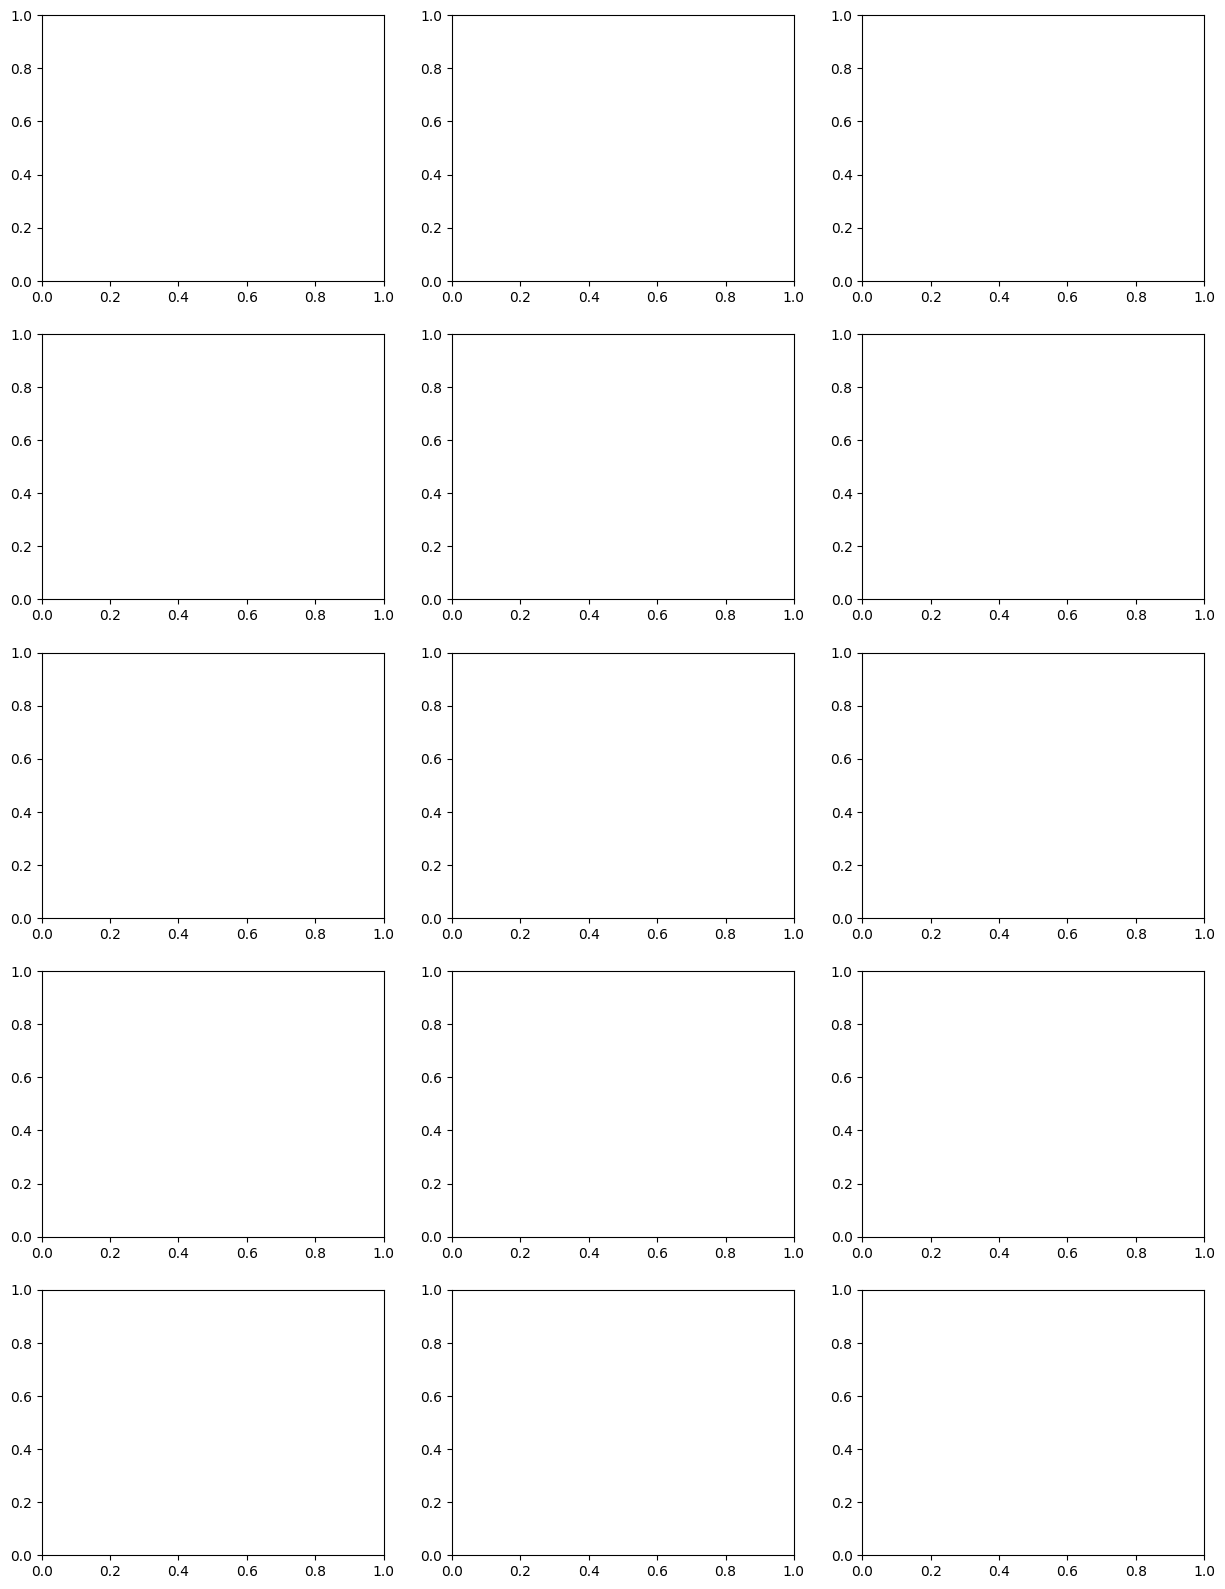

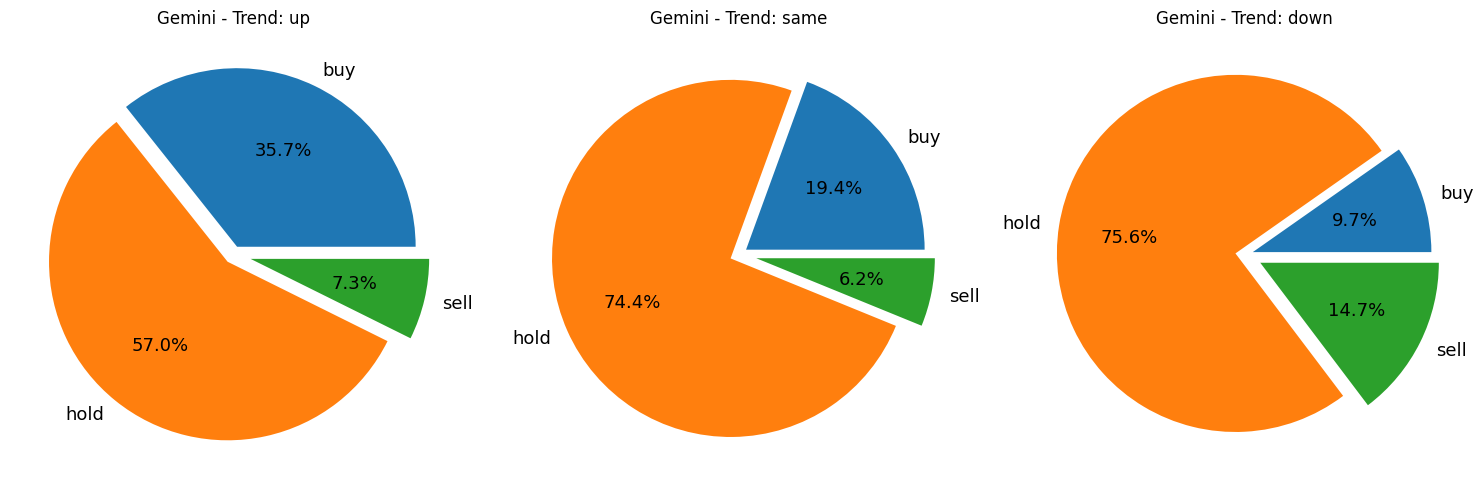

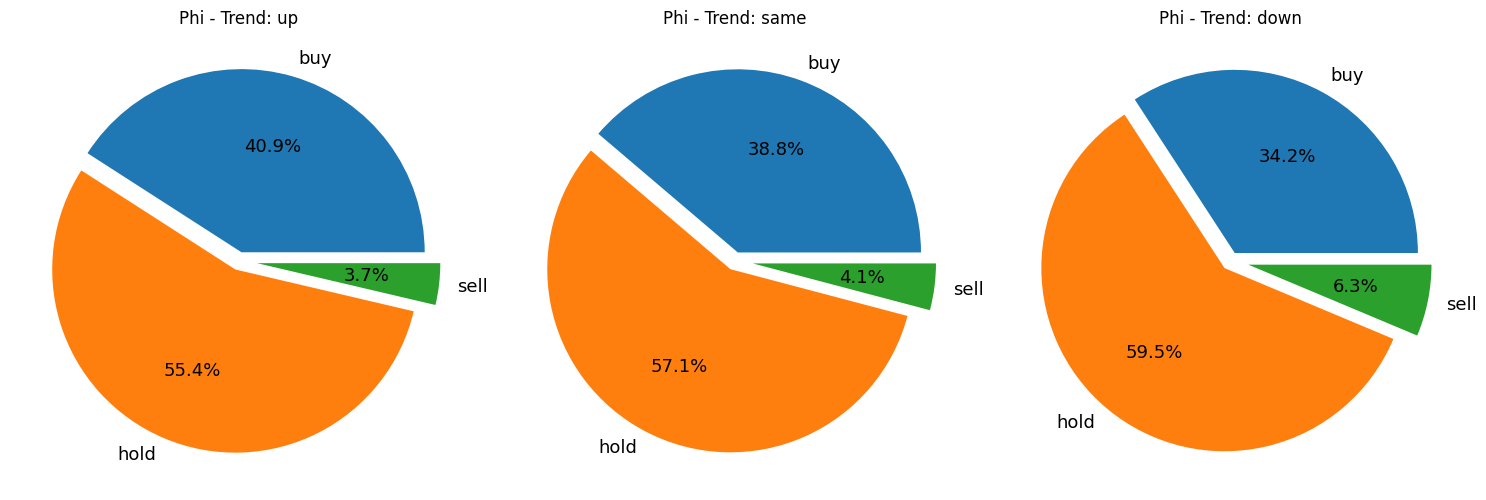

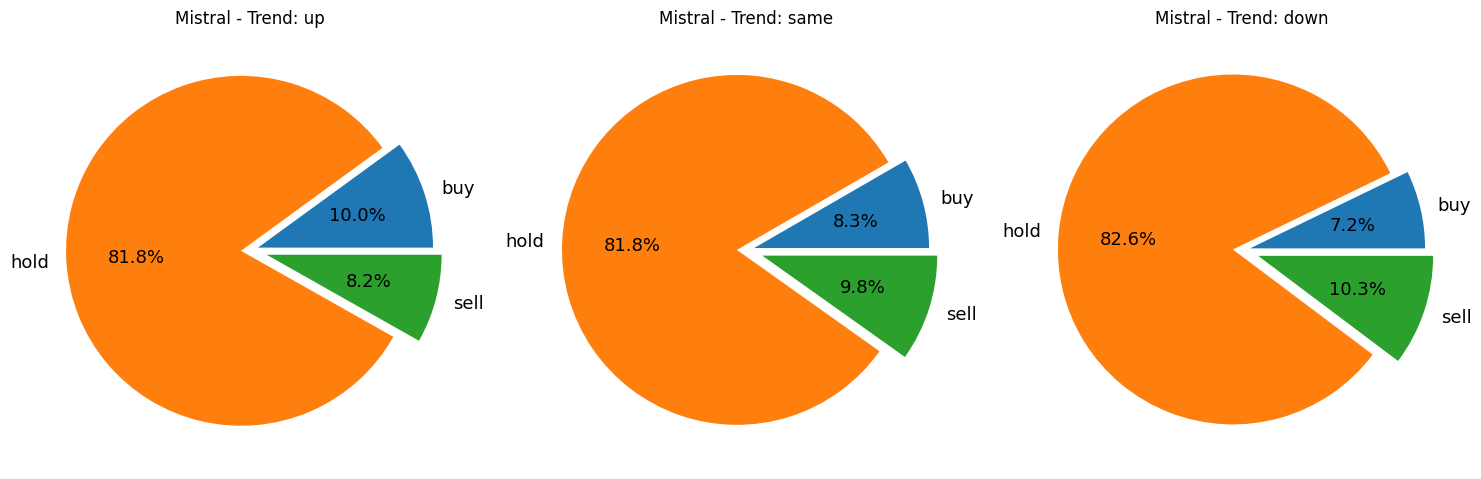

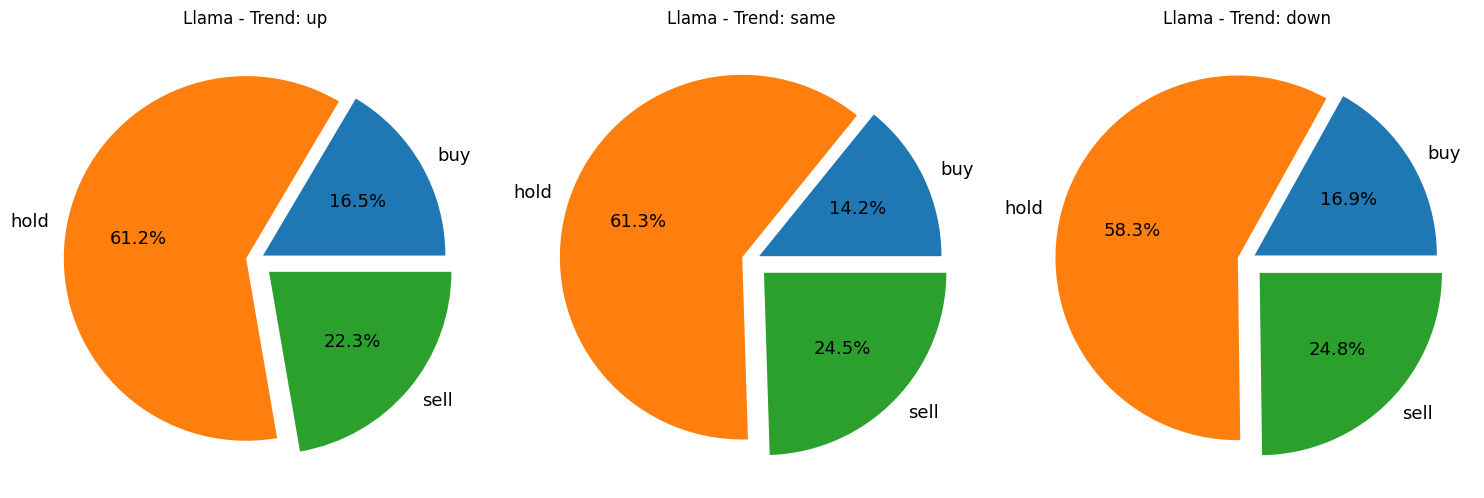

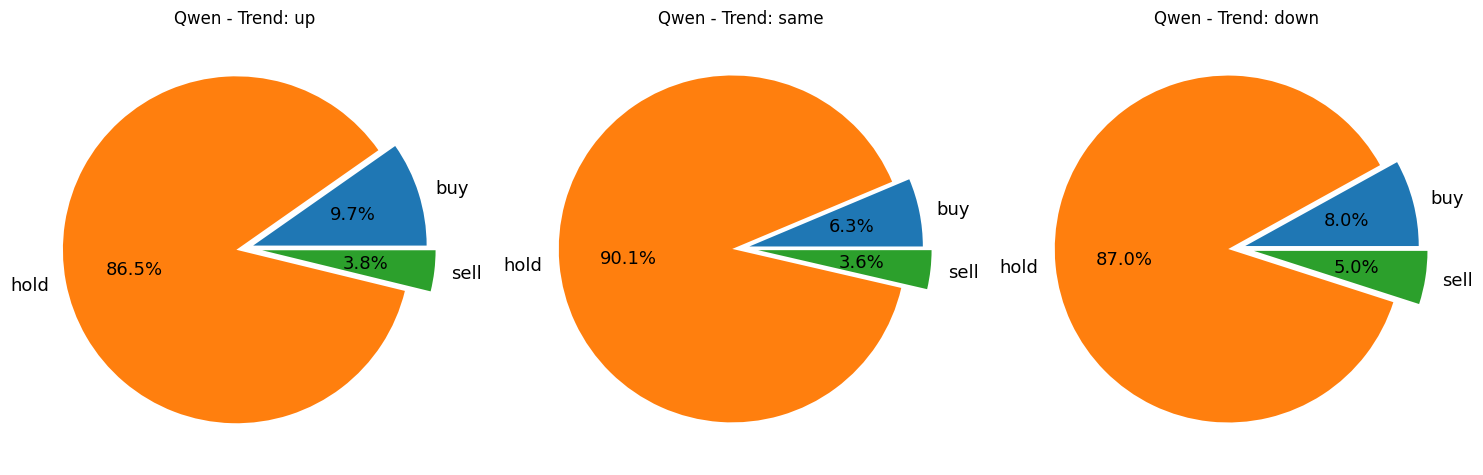

In [87]:
fig, axes = plt.subplots(5, 3, figsize=(15, 20))

# Define explode values for visibility of smaller segments
explode_values = (0.05, 0.05, 0.1)  # Adjust these values to explode small slices if needed

# Add Gemini traces
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    wedges, texts, autotexts = axes[i].pie(gemini_count[i], labels=actions, autopct='%1.1f%%', explode=explode_values)
    axes[i].set_title(f"Gemini - Trend: {trends[i]}")
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Adjust the font size for smaller percentages
    # Change size of the text labels for better readability
    for text in texts:
        text.set_fontsize(13)  # Adjust the font size for text labels
plt.tight_layout()
plt.show()

# Add Phi traces
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    wedges, texts, autotexts = axes[i].pie(phi_count[i], labels=actions, autopct='%1.1f%%', explode=explode_values)
    axes[i].set_title(f"Phi - Trend: {trends[i]}")
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Adjust the font size for smaller percentages
    # Change size of the text labels for better readability
    for text in texts:
        text.set_fontsize(13)  # Adjust the font size for text labels
plt.tight_layout()
plt.show()

# Add Mistral traces
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    wedges, texts, autotexts = axes[i].pie(mistral_count[i], labels=actions, autopct='%1.1f%%', explode=explode_values)
    axes[i].set_title(f"Mistral - Trend: {trends[i]}")
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Adjust the font size for smaller percentages
    # Change size of the text labels for better readability
    for text in texts:
        text.set_fontsize(13)  # Adjust the font size for text labels
plt.tight_layout()
plt.show()

# Add Llama traces
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    wedges, texts, autotexts = axes[i].pie(llama_count[i], labels=actions, autopct='%1.1f%%', explode=explode_values)
    axes[i].set_title(f"Llama - Trend: {trends[i]}")
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Adjust the font size for smaller percentages
    # Change size of the text labels for better readability
    for text in texts:
        text.set_fontsize(13)  # Adjust the font size for text labels
plt.tight_layout()
plt.show()

# Add Qwen traces
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    wedges, texts, autotexts = axes[i].pie(qwen_count[i], labels=actions, autopct='%1.1f%%', explode=explode_values)
    axes[i].set_title(f"Qwen - Trend: {trends[i]}")
    # Change size of the percentage labels for better readability
    for autotext in autotexts:
        autotext.set_fontsize(13)  # Adjust the font size for smaller percentages
    # Change size of the text labels for better readability
    for text in texts:
        text.set_fontsize(13)  # Adjust the font size for text labels
plt.tight_layout()
plt.show()
